# **SP Customer Loss Data - Analytics (Predictive and Prescriptive)**


**Importing Python Useful Python Libraries**





In [1]:
import plotly.graph_objs as go
import plotly as plt
import seaborn as sns
import numpy as np
import glob
import plotly.express as px
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
import statistics
import matplotlib.pyplot as plt
import spacy


from matplotlib.ticker import MultipleLocator
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org dython

In [2]:
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org xgboost

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#read in the csv file
SPL_df= pd.read_csv('gdrive/MyDrive/SP_Loss_Data.csv')

# **Interpreting the Variables**

Explanation of what each variable likely means in the context of a Scottish power company's data science operations:

### 1. *LossDate* (Date)
   - *Description*: The date when a customer left the company.
   - *Special Note*: If the customer is still with ScottishPower, the date is set to 31/12/9999 as a placeholder to indicate they haven't left.

### 2. *Loss* (Boolean)
   - *Description*: A flag to indicate whether the customer has left ScottishPower.
   - *Values*:
     - 1: The customer has left.
     - 0: The customer is still with the company.

### 3. *Account Start Date* (Date)
   - *Description*: The date when the customer initially joined ScottishPower.

### 4. *Account Determination Group* (String)
   - *Description*: Indicates whether the customer is a residential (domestic) customer or a small business (SME).

### 5. *Installment Plan* (Boolean)
   - *Description*: Specifies whether the customer is on a payment installment plan with ScottishPower.
   - *Values*:
     - 1: The customer is on an installment plan.
     - 0: The customer is not on an installment plan.

### 6. *Offset Value* (Float)
   - *Description*: The amount of money the customer currently owes to ScottishPower. Negative values might indicate a credit or overpayment.

### 7. *Debt Plan Group* (String)
   - *Description*: Indicates how the customer pays their bills.
   - *Values*:
     - PP: Prepayment Meter.
     - Cash: Cash payments.
     - DD: Direct Debit.

### 8. *Payment Frequency* (String)
   - *Description*: Describes how often the customer makes payments to ScottishPower (e.g., monthly, quarterly).

### 9. *Complaint Type* (String)
   - *Description*: The type of complaint the customer has lodged, if any.

### 10. *Status Grouping* (String)
   - *Description*: The current status of the most recent complaint, if a complaint has been made.

### 11. *Preferred Contact Method* (String)
   - *Description*: The customer’s preferred method of communication (e.g., email, phone, mail).

### 12. *Ofgem Risk Code* (String)
   - *Description*: Categorization by Ofgem (the UK energy regulator) indicating the customer’s vulnerability level.
   - *Values*:
     - PSR_High_Risk: High risk.
     - PSR_Medium_Risk_Plus_SFI: Medium risk with severe financial insecurity.
     - PSR_Medium_Risk: Medium risk.
     - PSR_Other_Flags: Low risk.
     - PSR_No_SNEED_Flags: No registered vulnerabilities.

### 13. *Mosaic Group* (String)
   - *Description*: Mosaic data is third-party marketing information that classifies households into segments based on postal codes.

### 14. *Mosaic Type* (String)
   - *Description*: A more detailed classification within the Mosaic Group.

### 15. *Mosaic Type Desc* (String)
   - *Description*: A description of the specific Mosaic Type.

### 16. *Mosaic Digital Group* (String)
   - *Description*: Digital classification based on Mosaic data, often used to target digital marketing.

### 17. *Mosaic Digital Group Desc* (String)
   - *Description*: A description of the specific Mosaic Digital Group.

### 18. *Mosaic FSS Group* (String)
   - *Description*: FSS (Financial Security Score) categorization from Mosaic, indicating financial stability levels.

### 19. *Mosaic FSS Type* (String)
   - *Description*: A specific type within the FSS Group.

### 20. *Mosaic Household Inc Value* (Int)
   - *Description*: Estimated household income based on Mosaic data.

### 21. *Mosaic Fuel Poverty Flag* (String)
   - *Description*: Indicates whether the household is considered to be in fuel poverty (i.e., spends a high proportion of income on energy).

### 22. *Mosaic Residence Type* (String)
   - *Description*: Type of residence (e.g., detached house, apartment) based on Mosaic data.

### 23. *Mosaic No Adults Household* (Int)
   - *Description*: The number of adults living in the household, as estimated by Mosaic data.



In [5]:
SPL_df

LossDate  Loss AccountStartdate AccountDeterminationGroup  \
0     08/05/2024     1       20/02/2014                  Domestic   
1     15/05/2024     1       19/11/2022                  Domestic   
2     29/05/2024     1       31/05/2023                  Domestic   
3     06/05/2024     1       24/09/2013                  Domestic   
4     16/05/2024     1       06/04/2019                  Domestic   
...          ...   ...              ...                       ...   
4995  31/12/9999     0       14/07/2021                  Domestic   
4996  31/12/9999     0       08/08/2022                  Domestic   
4997  31/12/9999     0       16/06/2015                  Domestic   
4998  31/12/9999     0       20/02/2017                  Domestic   
4999  31/12/9999     0       15/08/2021                  Domestic   

     InstallmentPlan  OffsetValue DebtPlanGroup PaymentFrequency  \
0                 No       488.17          Cash          Monthly   
1                 No        27.88          Cash          Monthly   
2                 No        66.87          Cash          Monthly   
3                 No        46.65          Cash        Quarterly   
4                 No      1145.62          Cash          Monthly   
...              ...          ...           ...              ...   
4995              No         4.22            DD          Monthly   
4996              No        72.77            DD          Monthly   
4997             Yes        30.24          Cash          Monthly   
4998              No        18.00            DD          Monthly   
4999              No       123.72            DD          Monthly   

     ComplaintType StatusGrouping  ...          MosaicGroup  \
0              NaN            NaN  ...        Vintage Value   
1              NaN            NaN  ...  Aspiring Homemakers   
2              NaN            NaN  ...          Rental Hubs   
3              NaN            NaN  ...    Municipal Tenants   
4              NaN            NaN  ...        Vintage Value   
...            ...            ...  ...                  ...   
4995           NaN            NaN  ...     Domestic Success   
4996           NaN            NaN  ...    Transient Renters   
4997           NaN            NaN  ...    Municipal Tenants   
4998           NaN            NaN  ...  Aspiring Homemakers   
4999           NaN            NaN  ...   Suburban Stability   

                MosaicType                                     MosaicTypeDesc  \
0          Pocket Pensions  Penny-wise elderly singles renting in developm...   
1      Contemporary Starts  Young families and singles setting up home in ...   
2            Central Pulse  City-loving youngsters renting central flats i...   
3           Mature Workers  Older social renters settled in low value home...   
4          Pocket Pensions  Penny-wise elderly singles renting in developm...   
...                    ...                                                ...   
4995  Cafes and Catchments  Affluent families with growing children living...   
4996         Value Rentals  Younger singles and couples, some with childre...   
4997  Inner City Stalwarts  Long-term renters of inner city social flats w...   
4998   Contemporary Starts  Young families and singles setting up home in ...   
4999        Fledgling Free  Pre-retirement couples enjoying greater space ...   

     MosaicDigitalGroup                             MosaicDigitalGroupDesc  \
0      Tentative Elders  Elderly singles and households with little to ...   
1     First-Gen Parents  Members of the first digital generation who ar...   
2      Digital Frontier  Young adults with sophisticated online behavio...   
3      Online Escapists  Singles and families with squeezed finances us...   
4      Tentative Elders  Elderly singles and households with little to ...   
...                 ...                                                ...   
4995  Upmarket Browsers  Affluent older families in suburban areas with...   
4996   O

# **Data Info**

In [6]:
SPL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LossDate                   5000 non-null   object 
 1   Loss                       5000 non-null   int64  
 2   AccountStartdate           5000 non-null   object 
 3   AccountDeterminationGroup  5000 non-null   object 
 4   InstallmentPlan            4946 non-null   object 
 5   OffsetValue                5000 non-null   float64
 6   DebtPlanGroup              5000 non-null   object 
 7   PaymentFrequency           5000 non-null   object 
 8   ComplaintType              979 non-null    object 
 9   StatusGrouping             979 non-null    object 
 10  CustomerCategory           5000 non-null   object 
 11  CustomerType               5000 non-null   object 
 12  PreferredContactMethod     5000 non-null   object 
 13  OfgemCodeRisk              5000 non-null   objec

# **Dealing with NaN Values**

From the table info it can be observed that InstallmentPlan, ComplaintType and StatusGrouping has Nan values that should be dealt with.

We would be making some assumptions to fill the nan values:

* Customers with no entry for installment plan will be assigned a "No"
* Customers with no complaints type will be assigned a 'None"
* Customers with no StatusGrouping will be assigned NA

In [7]:
SPL_df['ComplaintType'].fillna("None", inplace=True)

In [8]:
SPL_df['StatusGrouping'].fillna("NA", inplace=True)

In [9]:
SPL_df['InstallmentPlan'].fillna("No", inplace=True)

**Checking to see if there are any more NaN values left**


In [10]:
 SPL_df.isnull().any()

LossDate                     False
Loss                         False
AccountStartdate             False
AccountDeterminationGroup    False
InstallmentPlan              False
OffsetValue                  False
DebtPlanGroup                False
PaymentFrequency             False
ComplaintType                False
StatusGrouping               False
CustomerCategory             False
CustomerType                 False
PreferredContactMethod       False
OfgemCodeRisk                False
MosaicGroup                  False
MosaicType                   False
MosaicTypeDesc               False
MosaicDigitalGroup           False
MosaicDigitalGroupDesc       False
MosaicFSSGroup               False
MosaicFSSType                False
MosaicHouseholdIncValue      False
MosaicResidenceType          False
MosaicNoAdultsHousehold      False
dtype: bool

There are no more Nan values left so we proceed to do further preprocessing

# **Dealing with Strings**

Decided to shrink the Mosiac Type description and Mosiac Digital Group Decription using NLP technique for removing unwanted and useless charaters and letters for the modelling.

In [11]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [12]:
SPL_df["MosaicTypeDesc"].unique()

array(['Penny-wise elderly singles renting in developments of compact social homes',
       'Young families and singles setting up home in modern developments that are popular with their peers',
       'City-loving youngsters renting central flats in vibrant locations close to jobs and night life',
       'Older social renters settled in low value homes who are experienced at budgeting',
       'Tenants of social flats located in high rise blocks, often living alone',
       'Asset-rich families with substantial income, established in distinctive, expansive homes in wealthy enclaves',
       'Prosperous owners of country houses including affluent families, successful farmers and second-home owners',
       'Older residents owning small inner suburban properties with good access to amenities',
       'Affluent families with growing children living in upmarket housing in city environs',
       'Large families living in traditional terraces in neighbourhoods with a strong community identi

**Finding the top common words int the string data in mosaic type  string data description**

In [13]:
SPL_df["MosaicDigitalGroupDesc"].unique()

array(['Elderly singles and households with little to no interest in, or access to, digital technology',
       'Members of the first digital generation who are now starting their own households and careers',
       'Young adults with sophisticated online behaviour making full use of modern devices and social media',
       'Singles and families with squeezed finances using digital technology for everyday entertainment',
       'Affluent older families in suburban areas with upmarket tastes making practical use of digital technology',
       'Young singles and students exploring the cutting edge of latest social media and digital innovations',
       'Affluent families living urban lifestyles in rural settings, making practical use of digital technology for information and shopping',
       'Older and retired households enjoying life in isolated rural areas beyond broadband, and with limited interest in technology',
       'Members of diverse urban communities, some comfortable, some c

In [14]:
import nltk
nltk.download('wordnet')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text


SPL_df["MosaicTypeDesc3"] = SPL_df["MosaicTypeDesc"].apply(clean_text)

In [16]:
SPL_df["MosaicDigitalGroupDesc3"] = SPL_df["MosaicDigitalGroupDesc"].apply(clean_text)

In [17]:
del SPL_df["MosaicDigitalGroupDesc"]

In [18]:
del SPL_df['MosaicTypeDesc']

In [19]:
SPL_df["MosaicTypeDesc3"].unique()

array(['penny wise elderly single renting development compact social home',
       'young family single setting home modern development popular peer',
       'city loving youngster renting central flat vibrant location close job night life',
       'older social renter settled low value home experienced budgeting',
       'tenant social flat located high rise block often living alone',
       'asset rich family substantial income established distinctive expansive home wealthy enclave',
       'prosperous owner country house including affluent family successful farmer second home owner',
       'older resident owning small inner suburban property good access amenity',
       'affluent family growing child living upmarket housing city environs',
       'large family living traditional terrace neighbourhood strong community identity',
       'single renting small social flat town centre',
       'busy family child low cost home budget carefully',
       'stable family child renting higher

In [20]:
SPL_df

LossDate  Loss AccountStartdate AccountDeterminationGroup  \
0     08/05/2024     1       20/02/2014                  Domestic   
1     15/05/2024     1       19/11/2022                  Domestic   
2     29/05/2024     1       31/05/2023                  Domestic   
3     06/05/2024     1       24/09/2013                  Domestic   
4     16/05/2024     1       06/04/2019                  Domestic   
...          ...   ...              ...                       ...   
4995  31/12/9999     0       14/07/2021                  Domestic   
4996  31/12/9999     0       08/08/2022                  Domestic   
4997  31/12/9999     0       16/06/2015                  Domestic   
4998  31/12/9999     0       20/02/2017                  Domestic   
4999  31/12/9999     0       15/08/2021                  Domestic   

     InstallmentPlan  OffsetValue DebtPlanGroup PaymentFrequency  \
0                 No       488.17          Cash          Monthly   
1                 No        27.88          Cash          Monthly   
2                 No        66.87          Cash          Monthly   
3                 No        46.65          Cash        Quarterly   
4                 No      1145.62          Cash          Monthly   
...              ...          ...           ...              ...   
4995              No         4.22            DD          Monthly   
4996              No        72.77            DD          Monthly   
4997             Yes        30.24          Cash          Monthly   
4998              No        18.00            DD          Monthly   
4999              No       123.72            DD          Monthly   

     ComplaintType StatusGrouping  ...          MosaicGroup  \
0             None             NA  ...        Vintage Value   
1             None             NA  ...  Aspiring Homemakers   
2             None             NA  ...          Rental Hubs   
3             None             NA  ...    Municipal Tenants   
4             None             NA  ...        Vintage Value   
...            ...            ...  ...                  ...   
4995          None             NA  ...     Domestic Success   
4996          None             NA  ...    Transient Renters   
4997          None             NA  ...    Municipal Tenants   
4998          None             NA  ...  Aspiring Homemakers   
4999          None             NA  ...   Suburban Stability   

                MosaicType MosaicDigitalGroup        MosaicFSSGroup  \
0          Pocket Pensions   Tentative Elders       Declining Years   
1      Contemporary Starts  First-Gen Parents          Deal Seekers   
2            Central Pulse   Digital Frontier          Money Makers   
3           Mature Workers   Online Escapists          Cash Economy   
4          Pocket Pensions   Tentative Elders       Declining Years   
...                    ...                ...                   ...   
4995  Cafes and Catchments  Upmarket Browsers          Growth Phase   
4996         Value Rentals   Online Escapists     Earning Potential   
4997  Inner City Stalwarts   Online Escapists          Cash Economy   
4998   Contemporary Starts  First-Gen Parents     Earning Potential   
4999        Fledgling Free   Tentative Elders  Respectable Reserves   

           MosaicFSSType MosaicHouseholdIncValue MosaicResidenceType  \
0     Elderly Assistance                    9264                Flat   
1        Cost Optimisers                   25973       Semi-Detached   
2              City Buzz                   54227                Flat   
3      Workaday Families                   22953            Terraced   
4     Elderly Assistance                    9264                Flat   
...                  ...                     ...                 ...   
4995   Mid-way Mortgages                   47663       Semi-Detached   
4996   Living Wage Youth                   12950       Semi-Detached   
4997       Ageing Basics                   15725            Terraced   
4998   Domestic Startups        

**Exploratory Data Analysis**

In [21]:
# Identify rows with out-of-bounds dates
out_of_bounds_dates = SPL_df[(SPL_df['LossDate'] == '9999-12-31') | (SPL_df['LossDate'].isna())]
#print(out_of_bounds_dates)


In [22]:
# Identify and replace placeholder dates with NaT
SPL_df['LossDate'] = pd.to_datetime(SPL_df['LossDate'], errors='coerce')  # Convert valid dates
SPL_df['LossDate'] = SPL_df['LossDate'].replace(pd.Timestamp('9999-12-31'), pd.NaT)  # Replace specific placeholder dates with NaT



In [23]:
# Handle missing dates (e.g., fill with a specific date or drop rows)
#SPL_df['AccountStartdate'].fillna(pd.Timestamp('1999-01-01'), inplace=True)  # Replace NaT with a default date
# or
# SPL_df.dropna(subset=['AccountStartdate'], inplace=True)  # Drop rows with NaT if they are not needed


In [24]:
SPL_df.head()

LossDate  Loss AccountStartdate AccountDeterminationGroup InstallmentPlan  \
0 2024-08-05     1       20/02/2014                  Domestic              No   
1        NaT     1       19/11/2022                  Domestic              No   
2        NaT     1       31/05/2023                  Domestic              No   
3 2024-06-05     1       24/09/2013                  Domestic              No   
4        NaT     1       06/04/2019                  Domestic              No   

   OffsetValue DebtPlanGroup PaymentFrequency ComplaintType StatusGrouping  \
0       488.17          Cash          Monthly          None             NA   
1        27.88          Cash          Monthly          None             NA   
2        66.87          Cash          Monthly          None             NA   
3        46.65          Cash        Quarterly          None             NA   
4      1145.62          Cash          Monthly          None             NA   

   ...          MosaicGroup           MosaicType MosaicDigitalGroup  \
0  ...        Vintage Value      Pocket Pensions   Tentative Elders   
1  ...  Aspiring Homemakers  Contemporary Starts  First-Gen Parents   
2  ...          Rental Hubs        Central Pulse   Digital Frontier   
3  ...    Municipal Tenants       Mature Workers   Online Escapists   
4  ...        Vintage Value      Pocket Pensions   Tentative Elders   

    MosaicFSSGroup       MosaicFSSType MosaicHouseholdIncValue  \
0  Declining Years  Elderly Assistance                    9264   
1     Deal Seekers     Cost Optimisers                   25973   
2     Money Makers           City Buzz                   54227   
3     Cash Economy   Workaday Families                   22953   
4  Declining Years  Elderly Assistance                    9264   

  MosaicResidenceType MosaicNoAdultsHousehold  \
0                Flat                       1   
1       Semi-Detached                       2   
2                Flat                       2   
3            Terraced                       2   
4                Flat                       1   

                                     MosaicTypeDesc3  \
0  penny wise elderly single renting development ...   
1  young family single setting home modern develo...   
2  city loving youngster renting central flat vib...   
3  older social renter settled low value home exp...   
4  penny wise elderly single renting development ...   

                             MosaicDigitalGroupDesc3  
0  elderly single household little interest acces...  
1  member first digital generation starting house...  
2  young adult sophisticated online behaviour mak...  
3  single family squeezed finance using digital t...  
4  elderly single household little interest acces...  

[5 rows x 24 columns]

In [25]:
SPL_df['AccountStartdate'] = pd.to_datetime(SPL_df['AccountStartdate'], errors='coerce')


In [26]:
#print(SPL_df[['LossDate', 'AccountStartdate']].head())


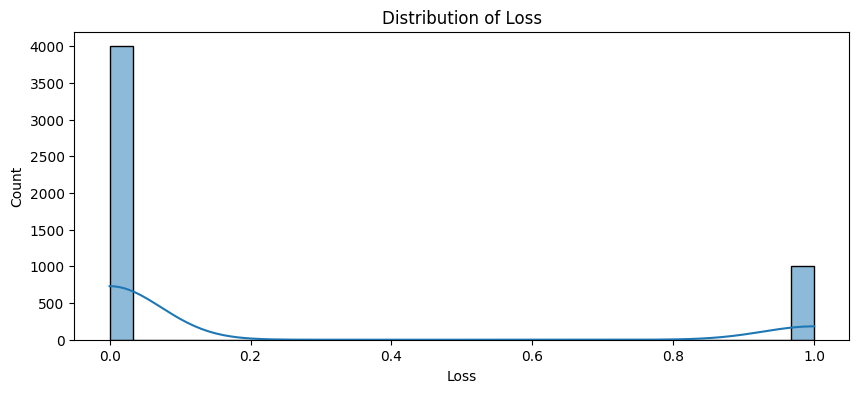

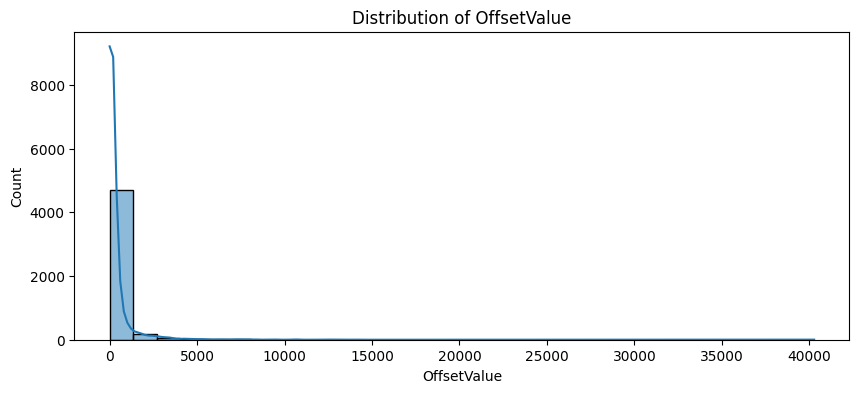

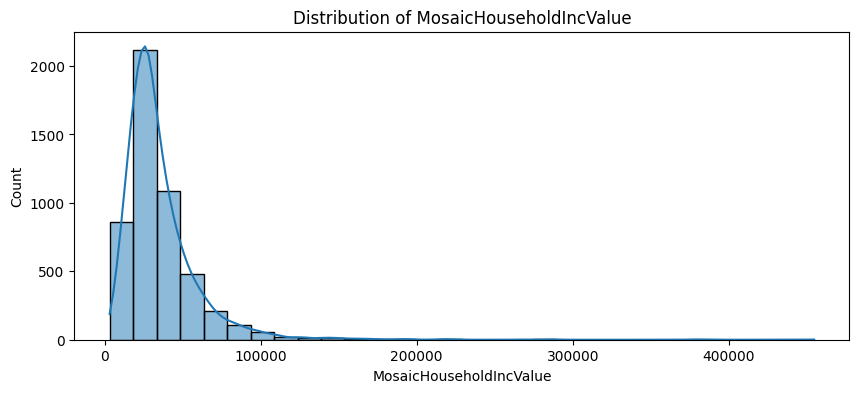

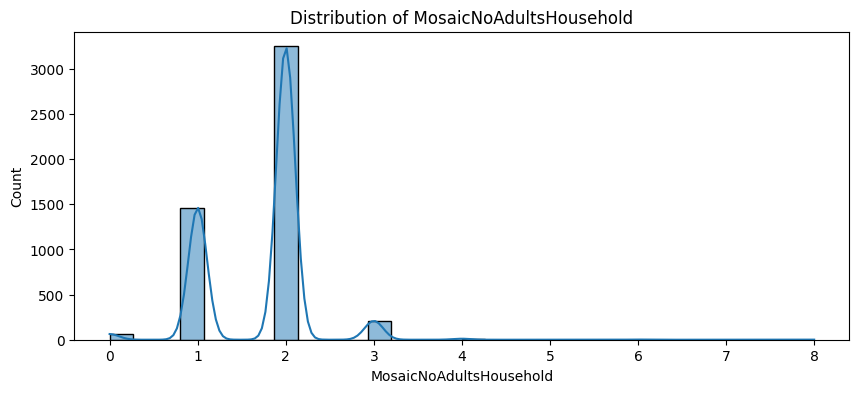

In [27]:
# Distribution of numerical features
for col in ['Loss', 'OffsetValue', 'MosaicHouseholdIncValue', 'MosaicNoAdultsHousehold']:
    plt.figure(figsize=(10, 4))
    sns.histplot(SPL_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


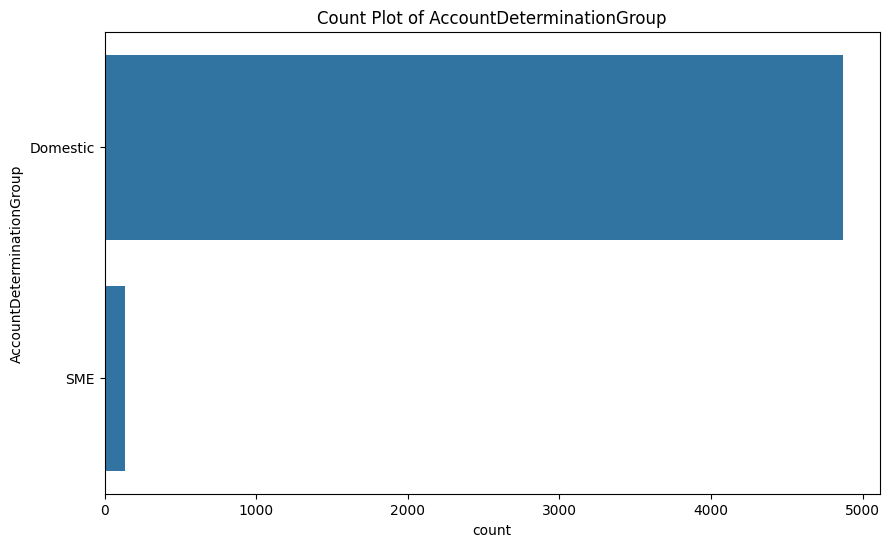

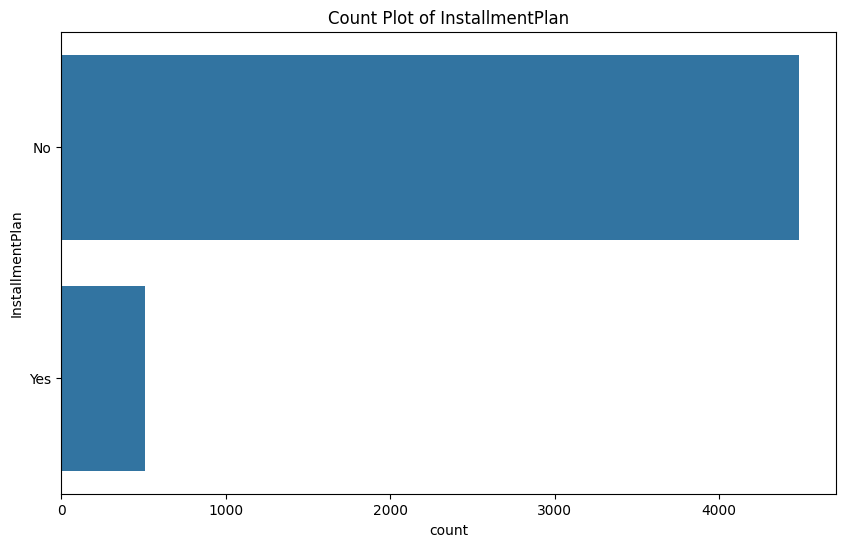

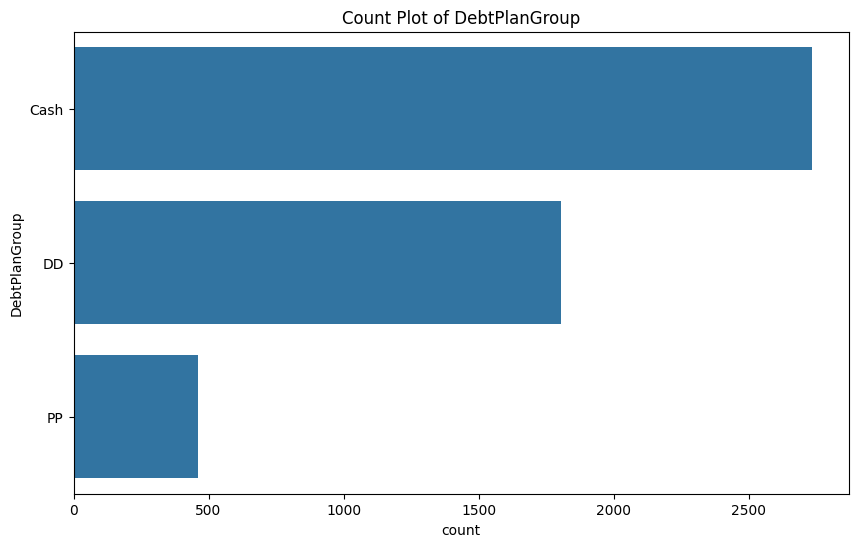

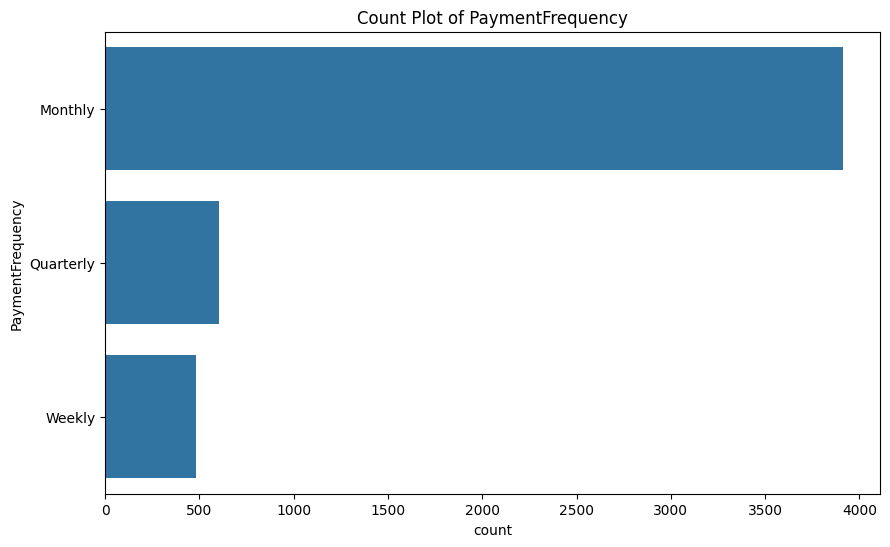

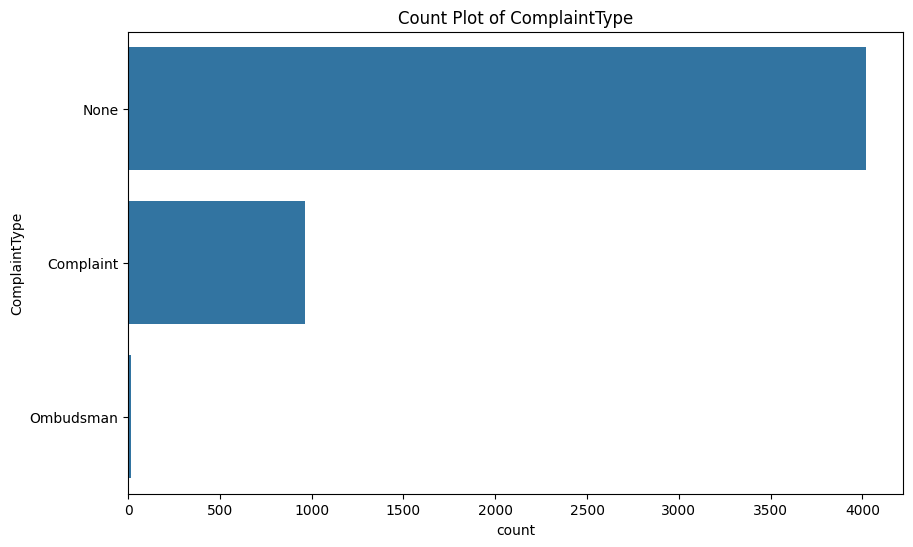

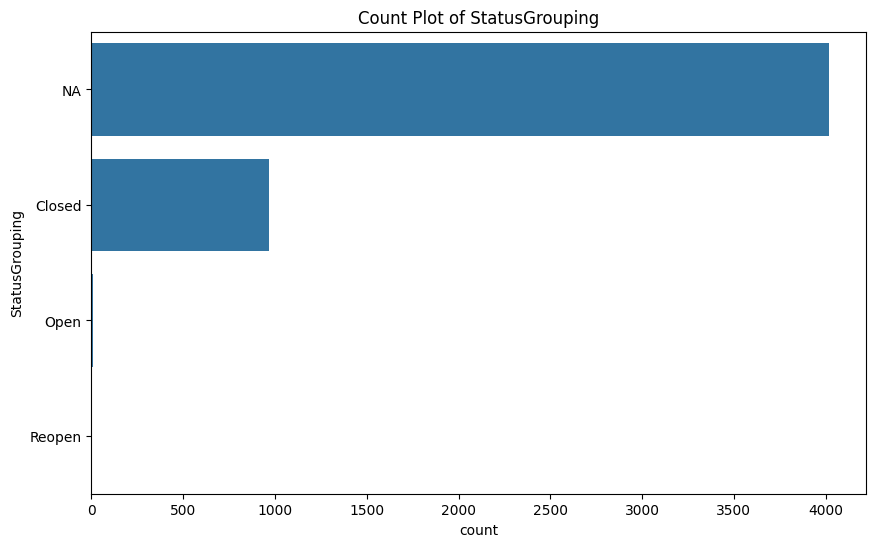

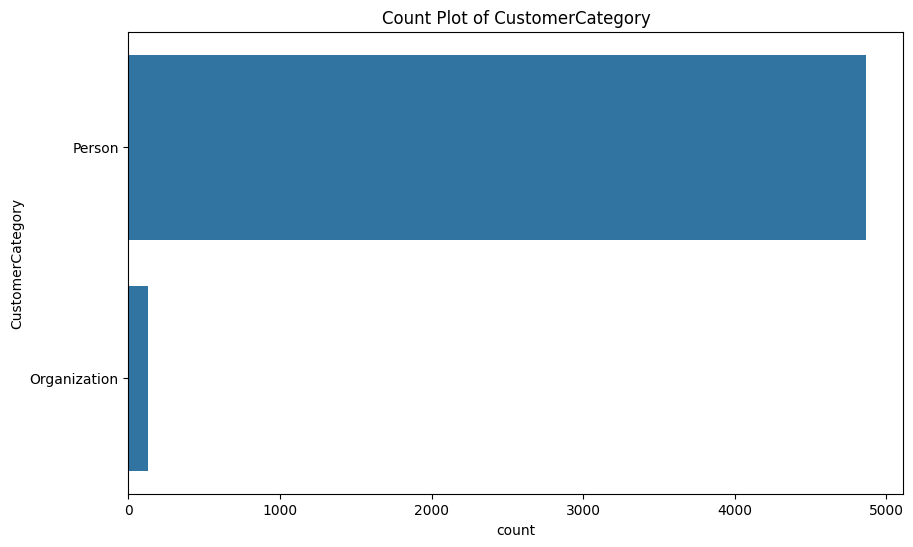

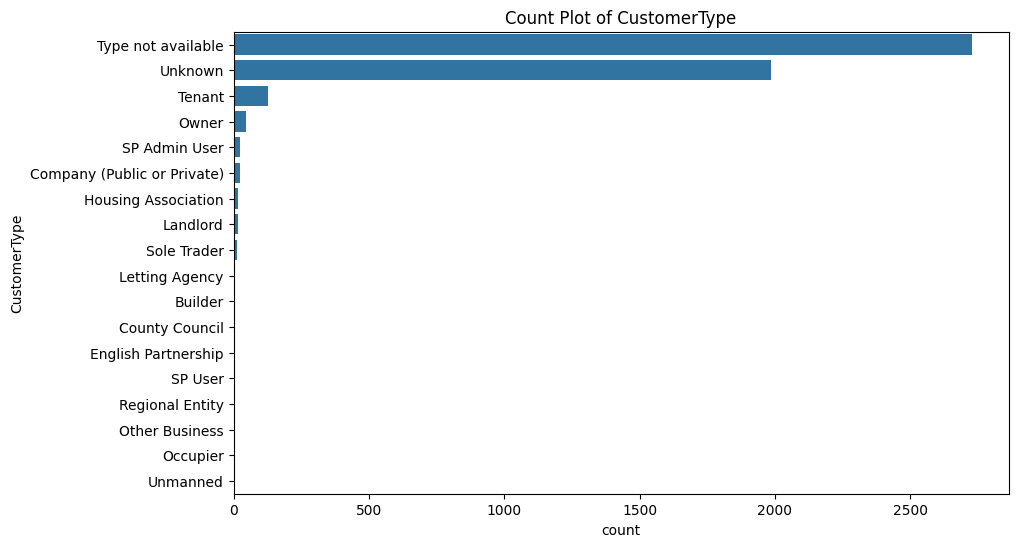

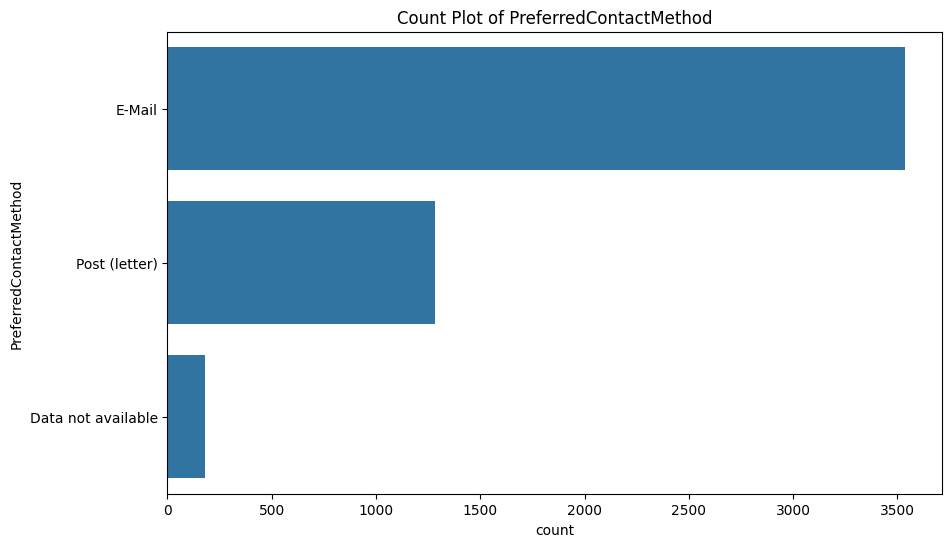

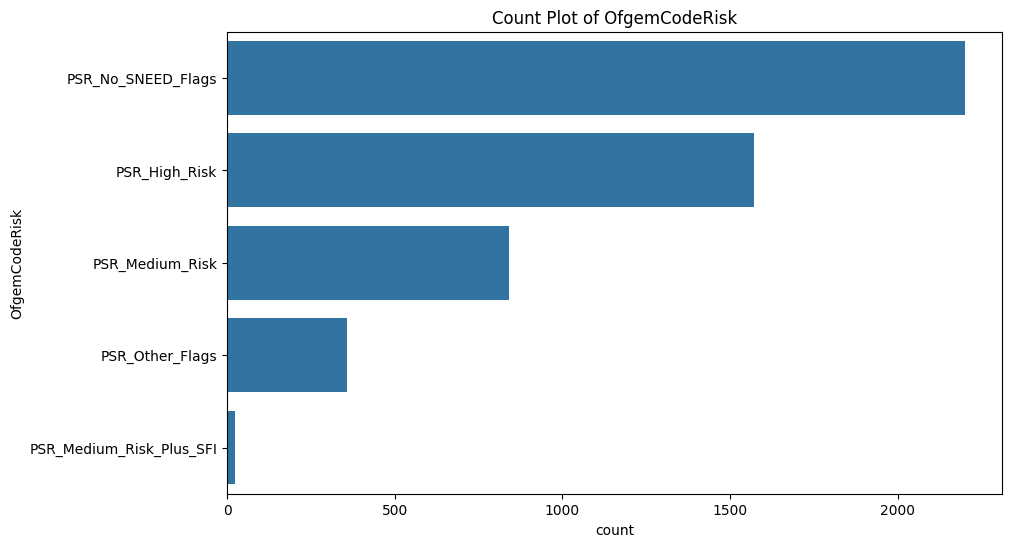

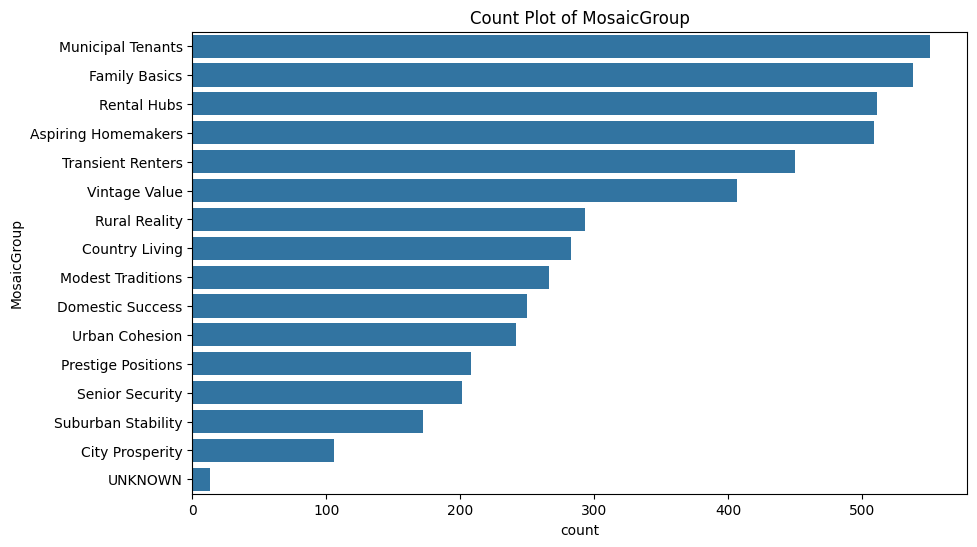

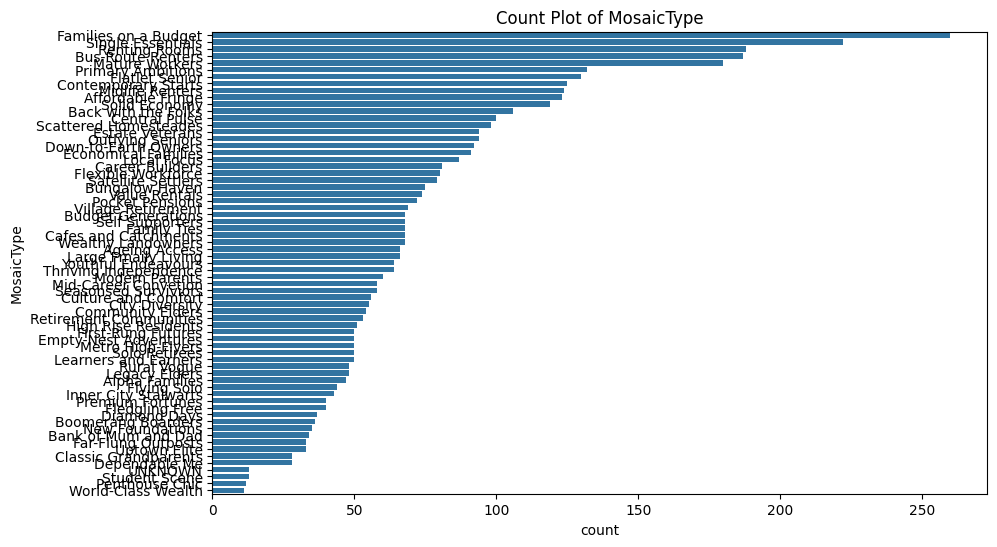

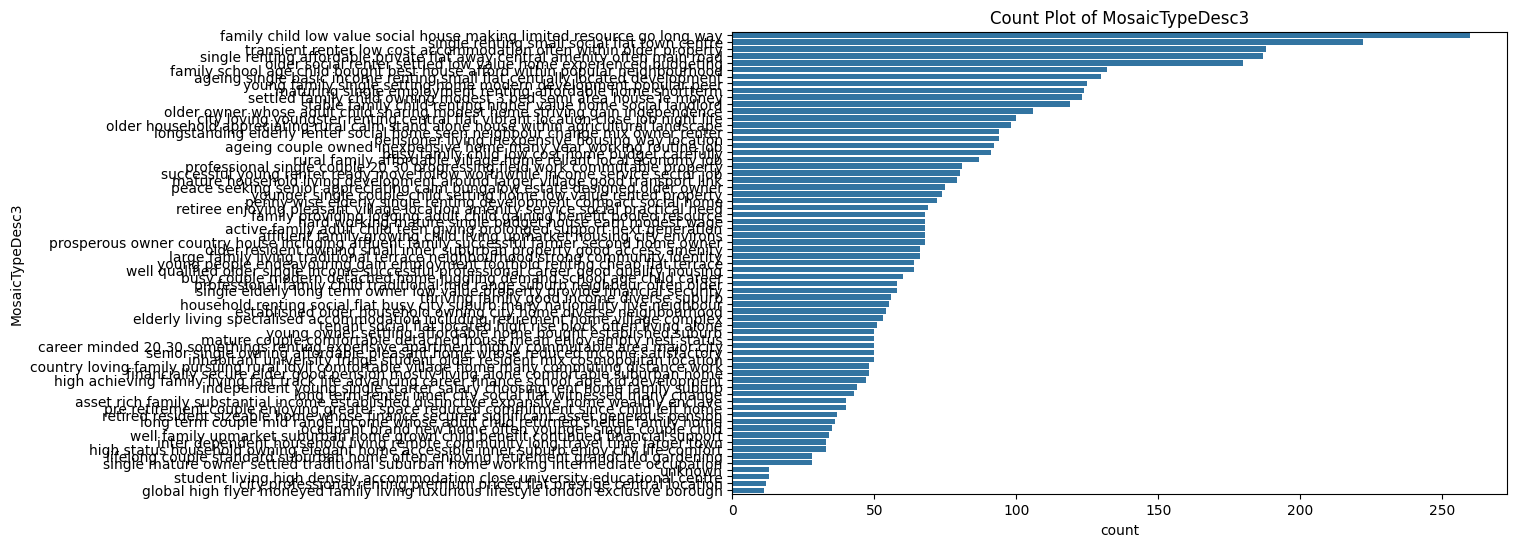

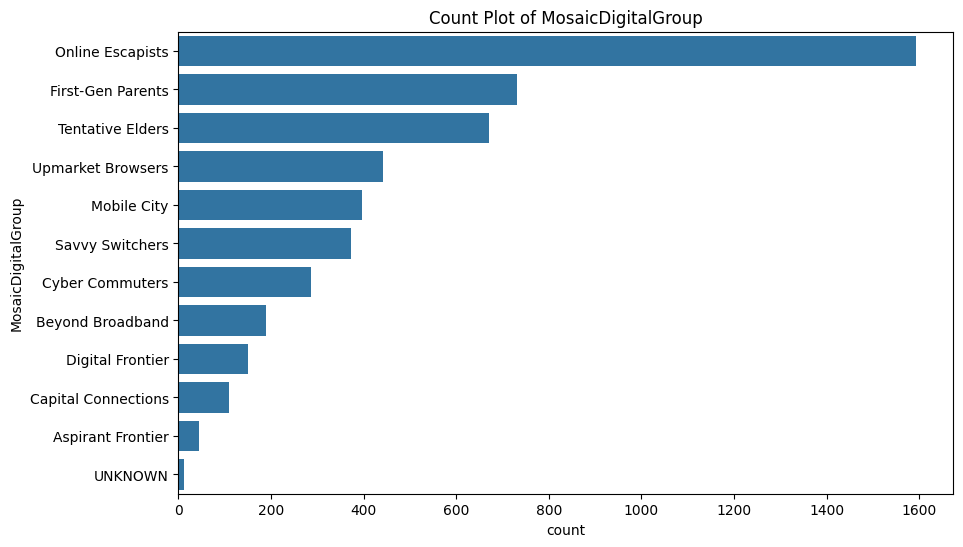

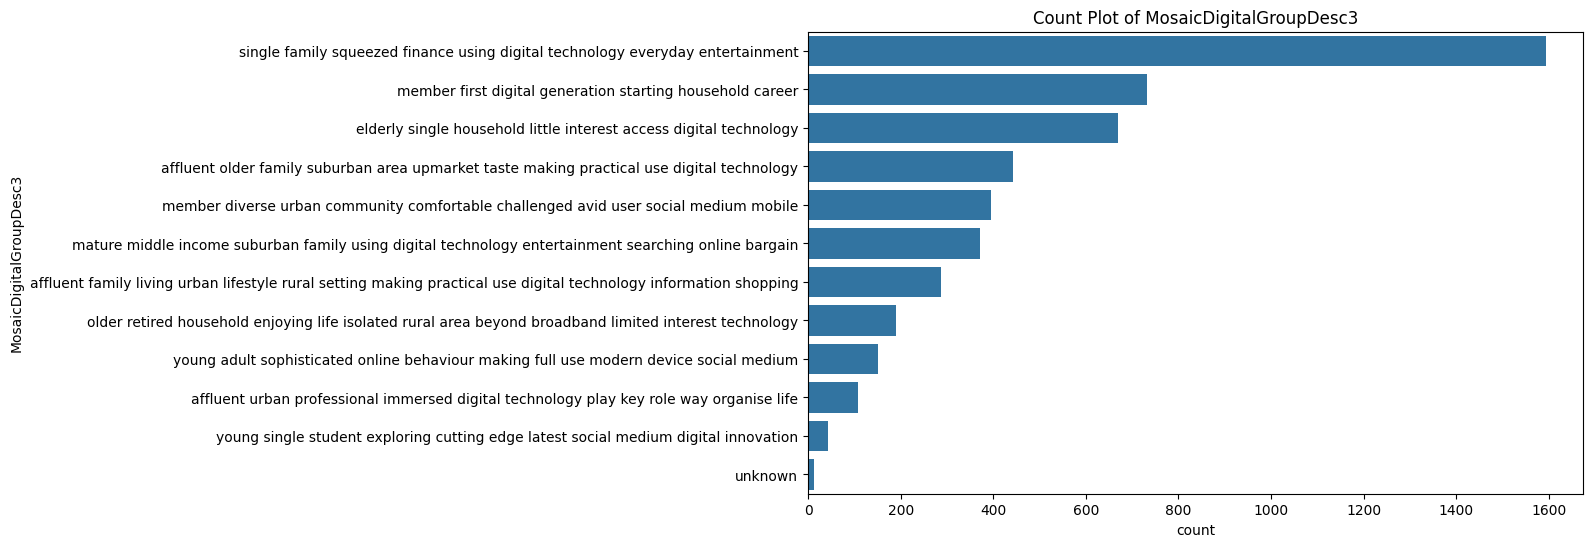

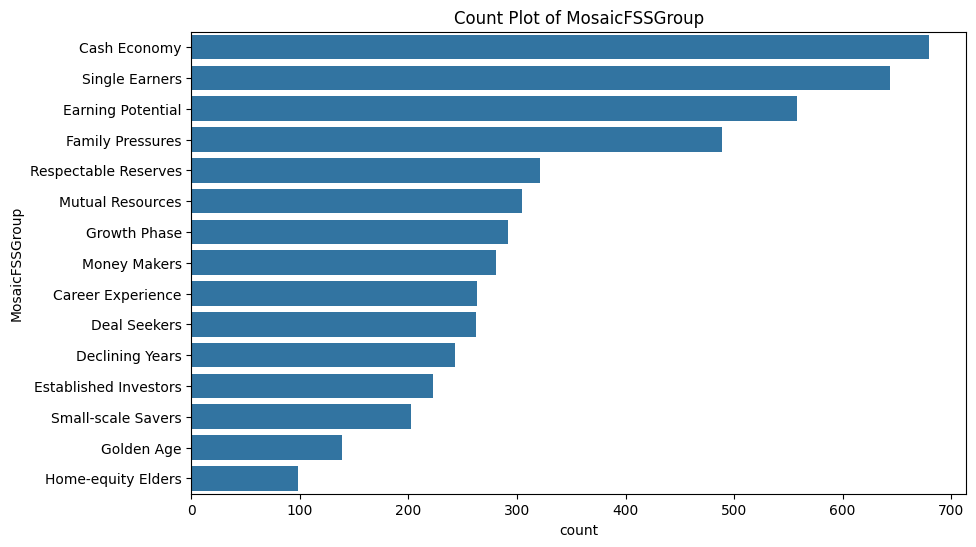

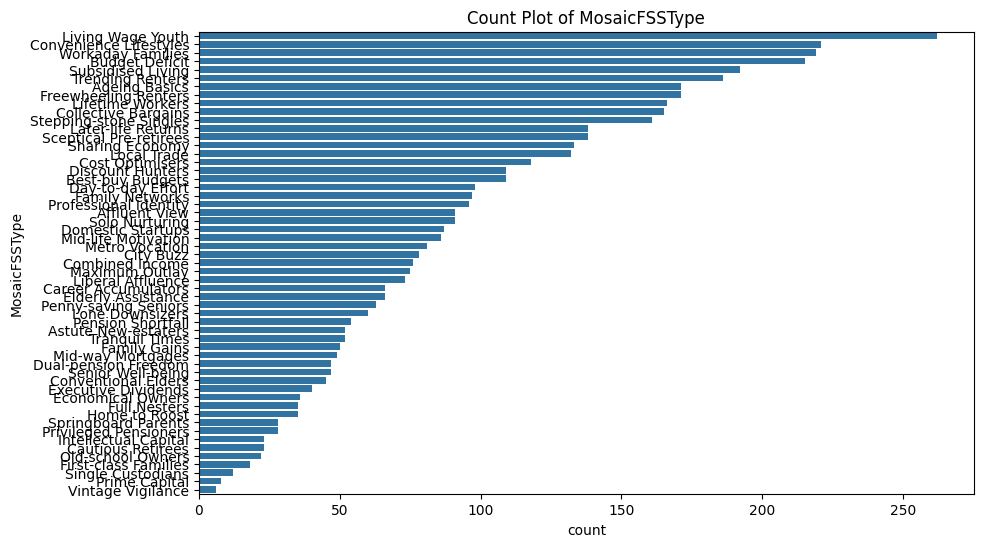

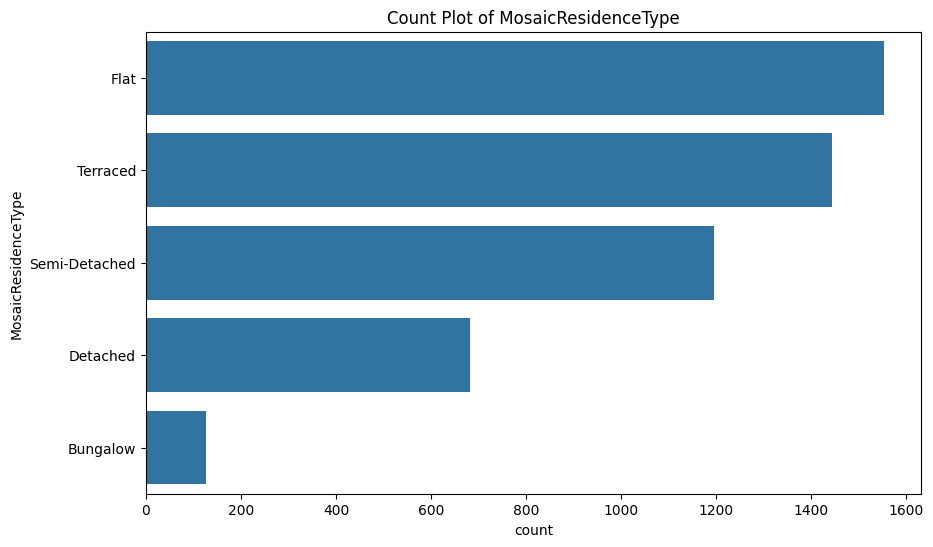

In [28]:
# Count plot for categorical features
categorical_columns = [
    'AccountDeterminationGroup', 'InstallmentPlan', 'DebtPlanGroup', 'PaymentFrequency',
    'ComplaintType', 'StatusGrouping', 'CustomerCategory', 'CustomerType',
    'PreferredContactMethod', 'OfgemCodeRisk', 'MosaicGroup', 'MosaicType',
    'MosaicTypeDesc3', 'MosaicDigitalGroup', 'MosaicDigitalGroupDesc3', 'MosaicFSSGroup',
    'MosaicFSSType', 'MosaicResidenceType'
]

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=SPL_df, y=col, order=SPL_df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()


In [29]:
# Calculate churn rate
churn_rate = SPL_df['Loss'].mean()
print(f'Churn Rate: {churn_rate:.2%}')

# Distribution of churn
churn_distribution = SPL_df['Loss'].value_counts(normalize=True)
print(churn_distribution)



Churn Rate: 20.00%
Loss
0    0.8
1    0.2
Name: proportion, dtype: float64


**UniVariate Analysis**

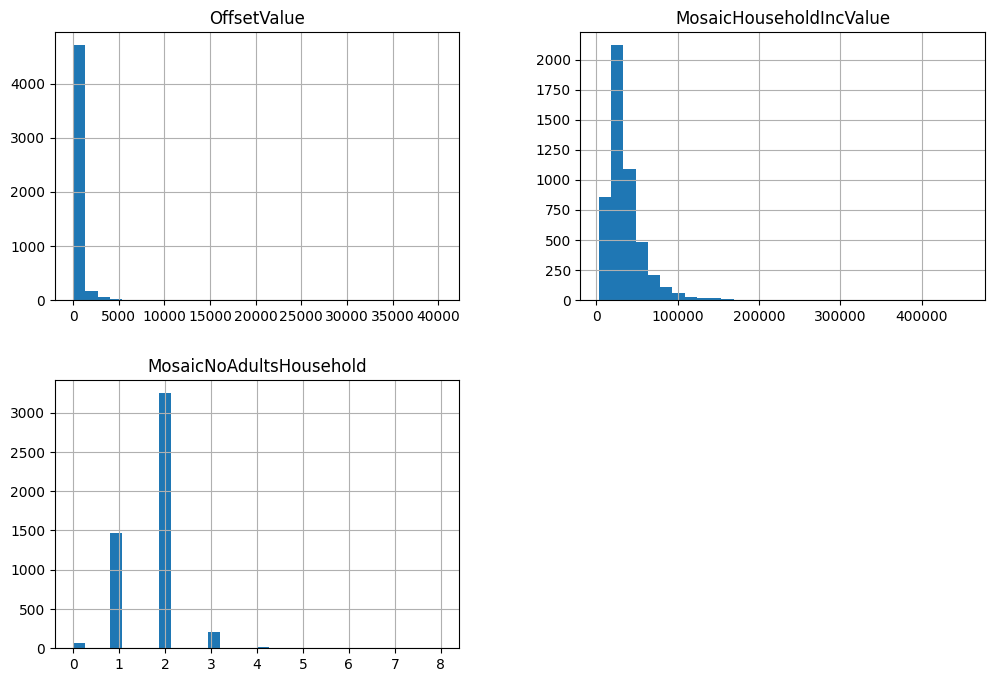

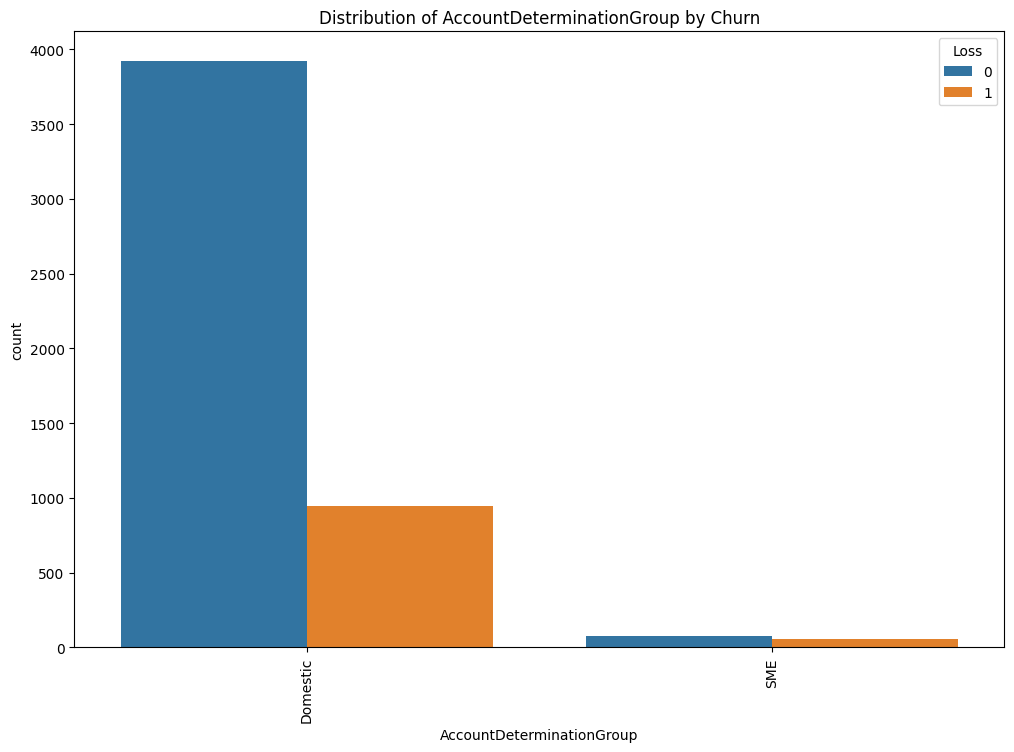

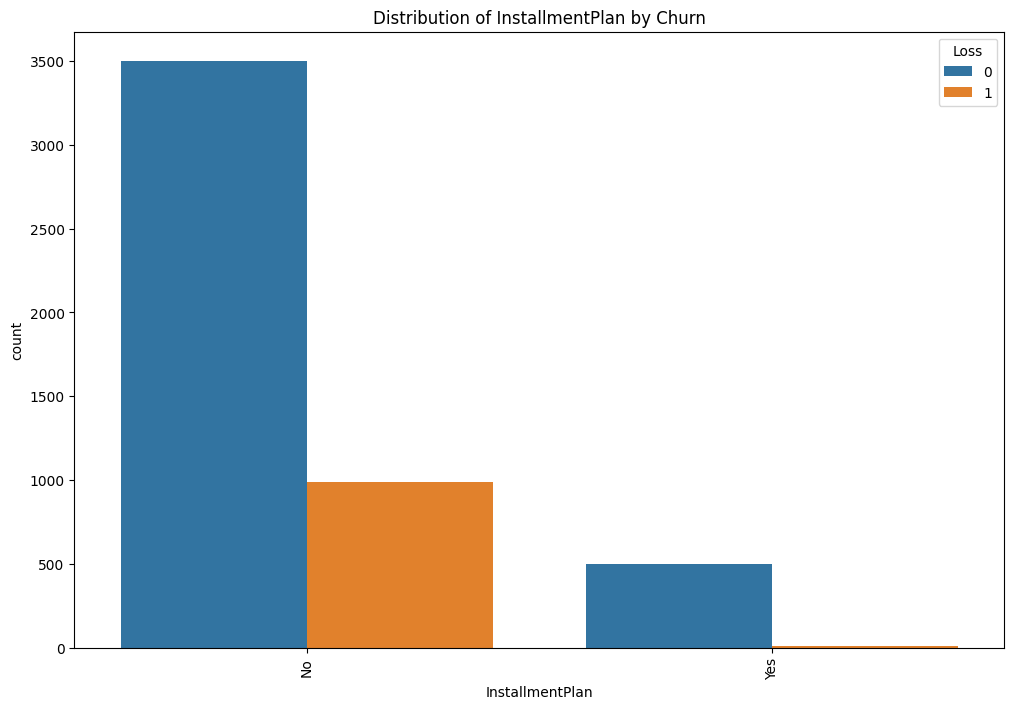

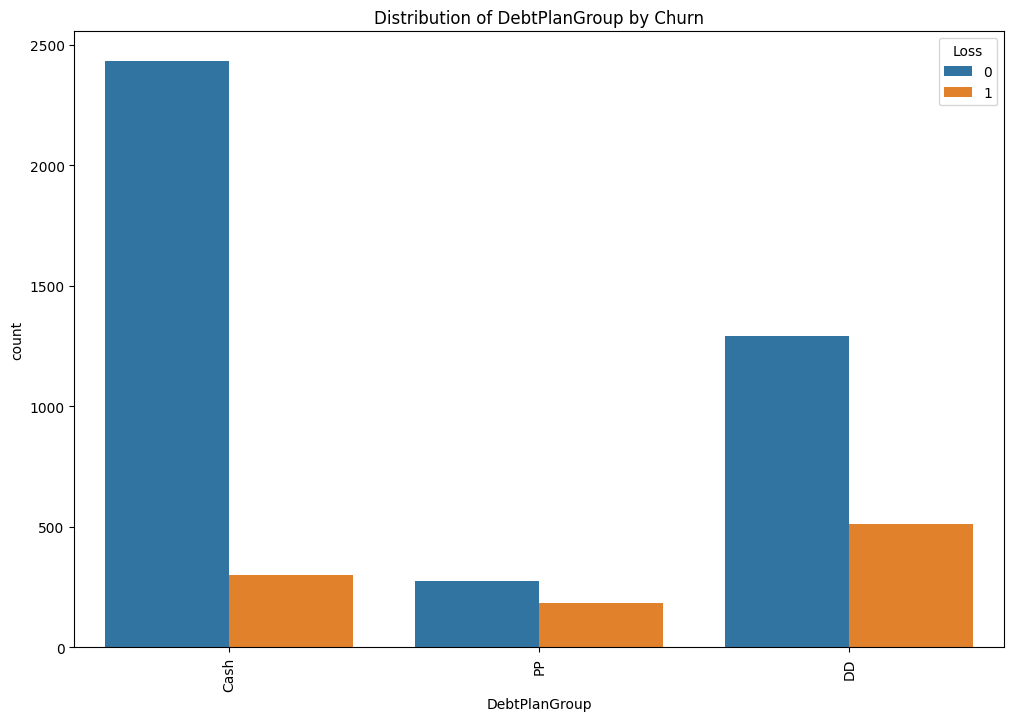

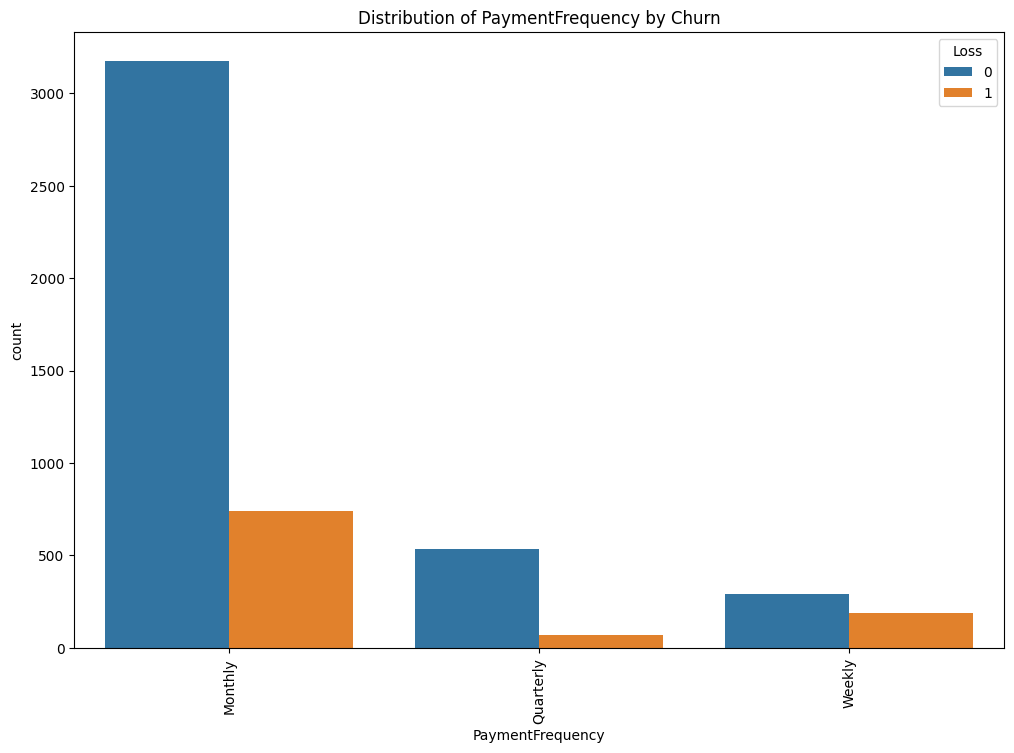

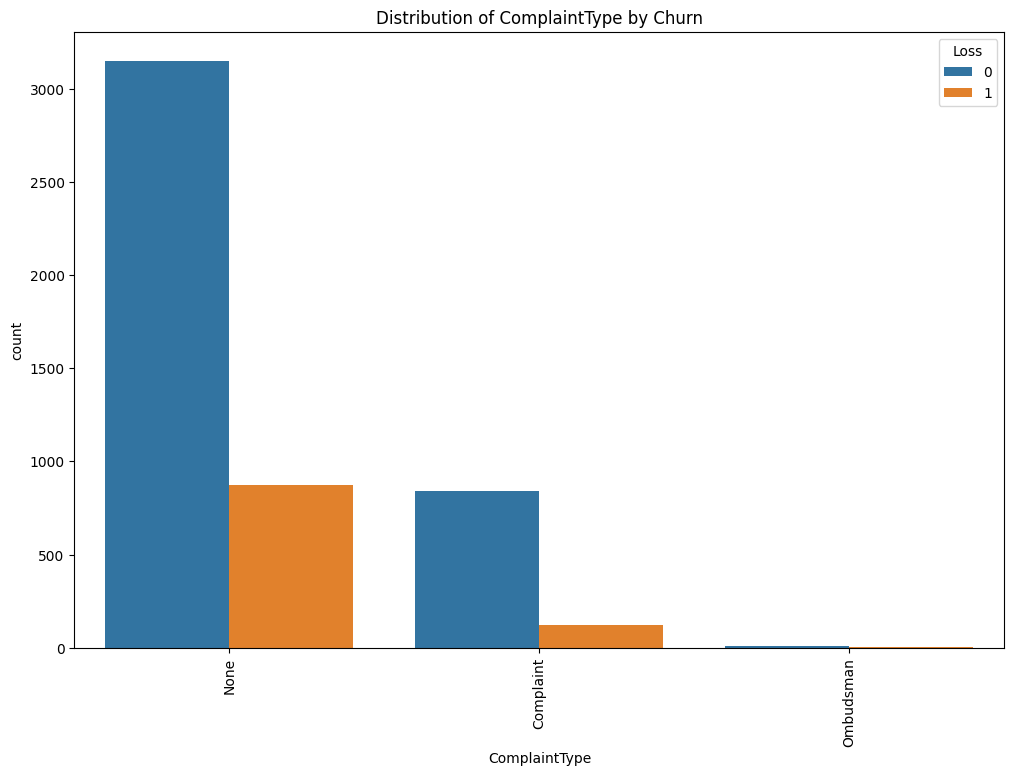

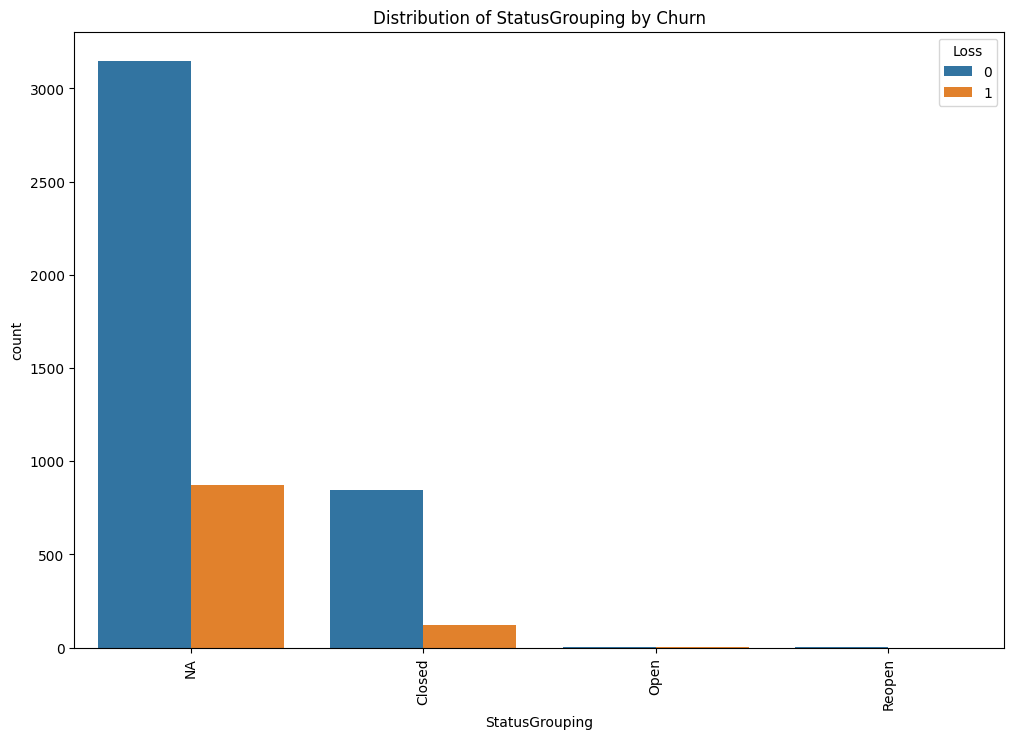

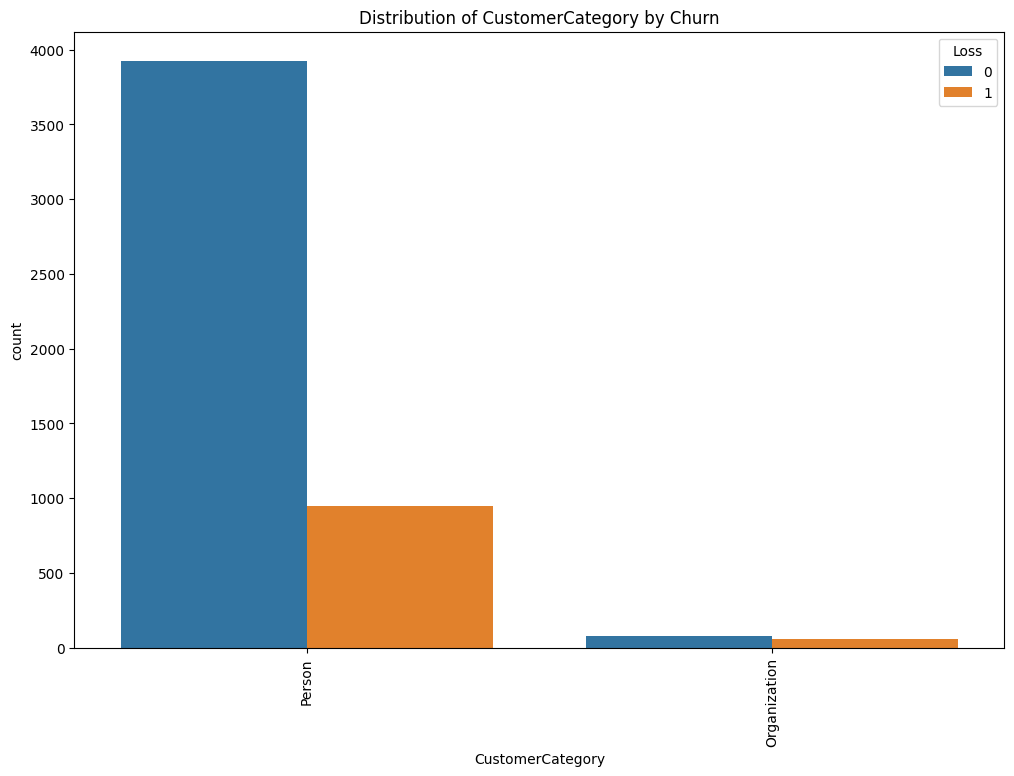

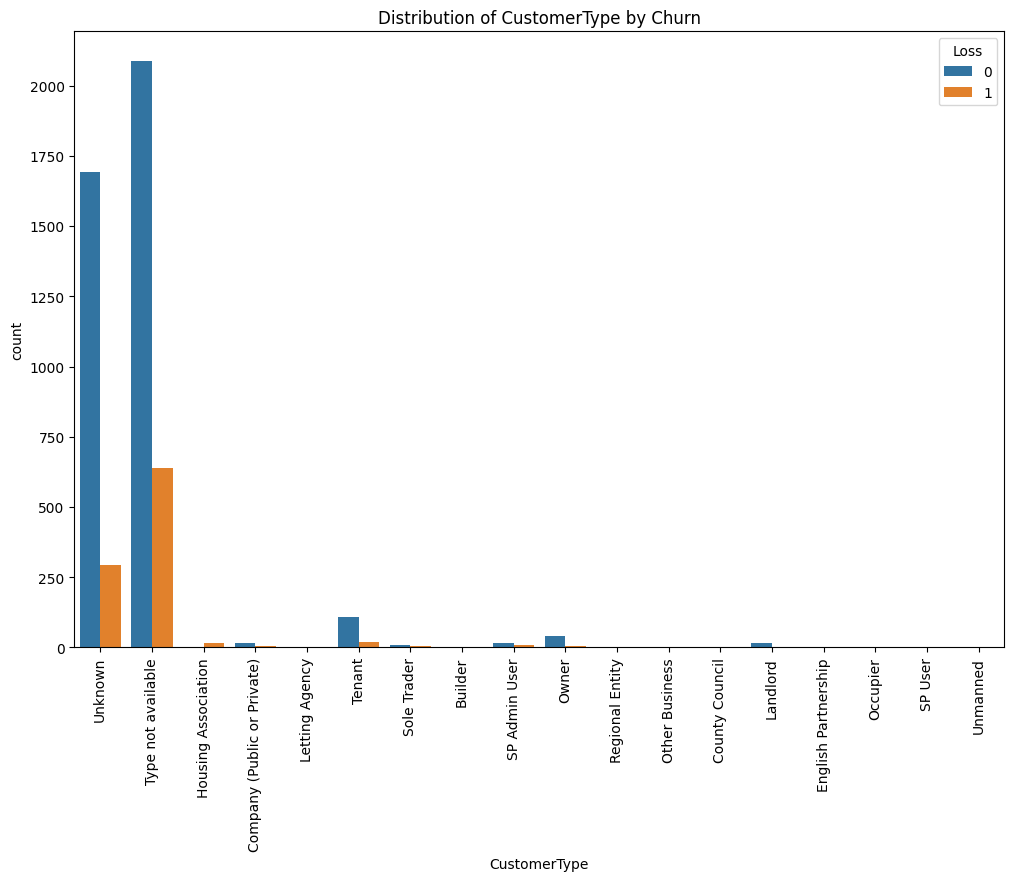

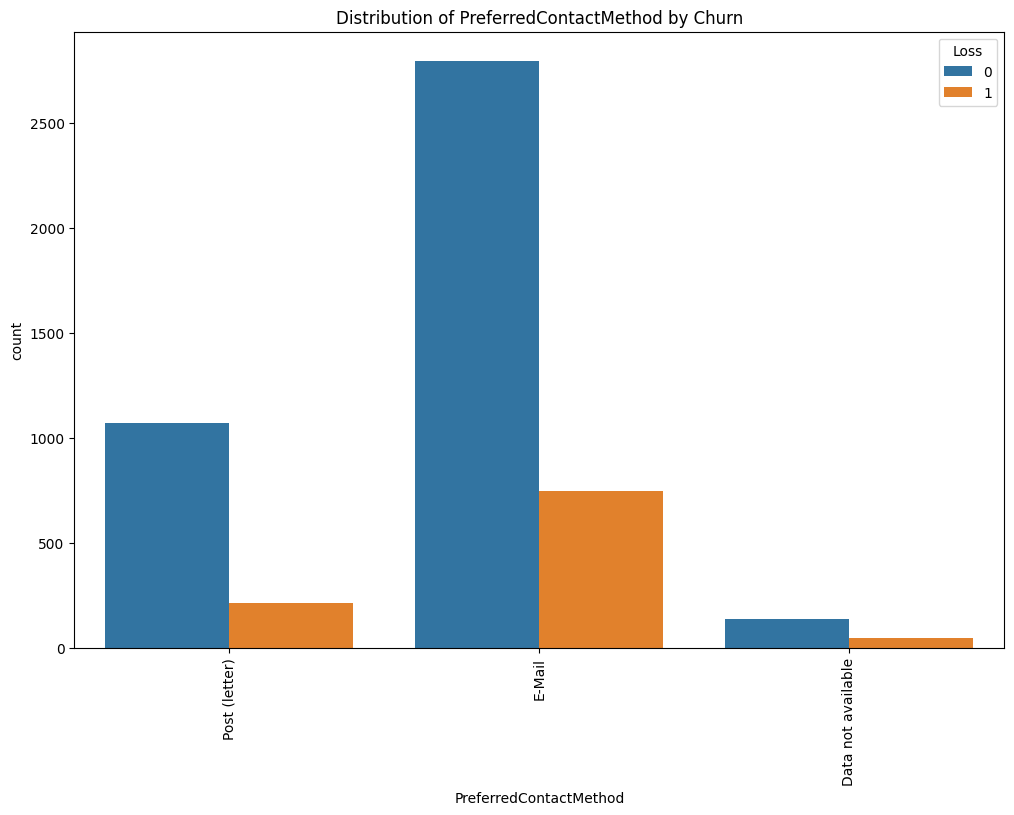

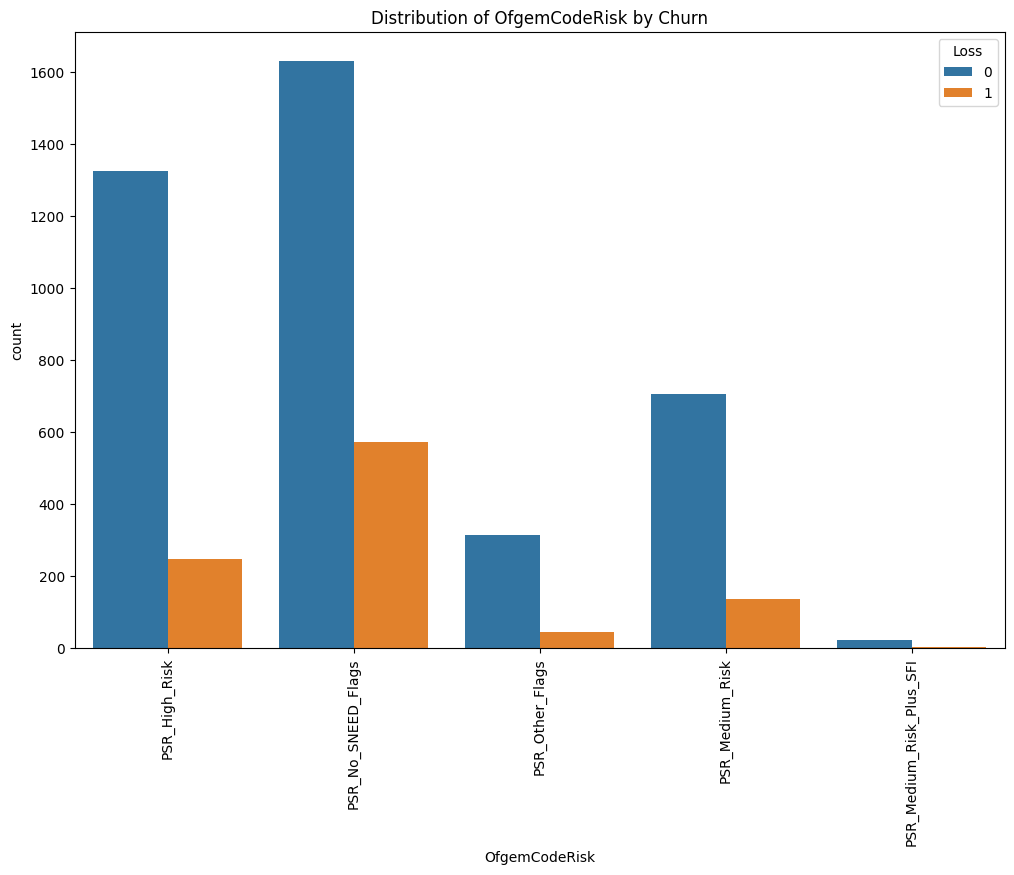

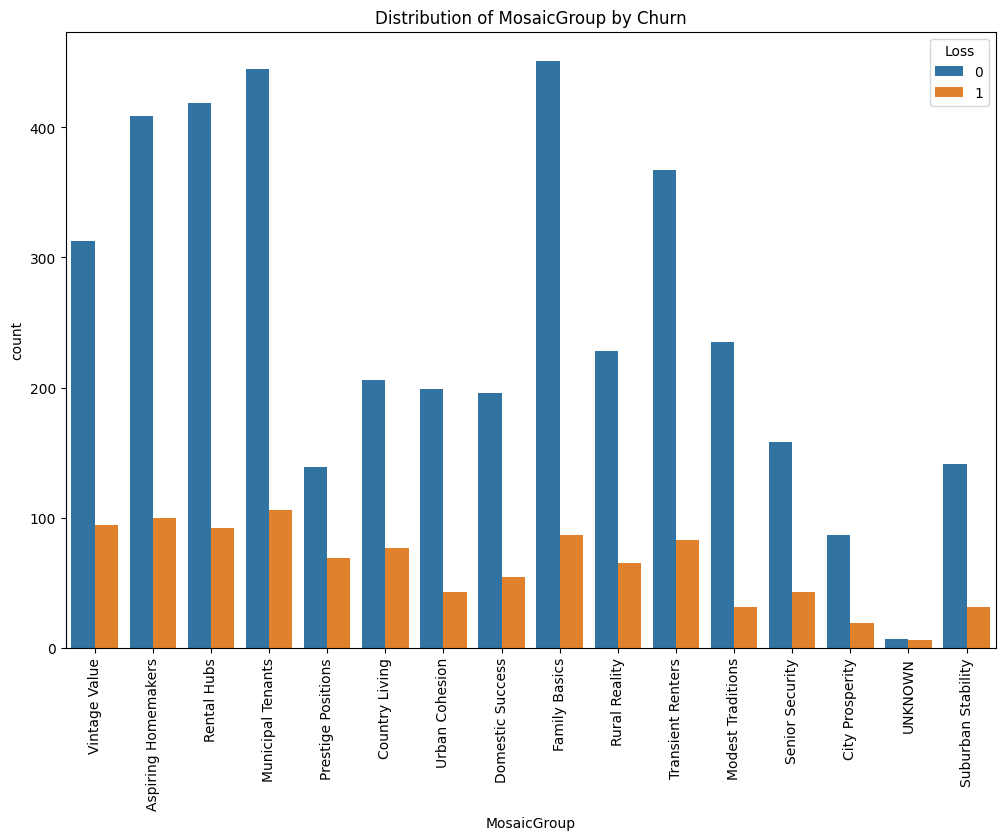

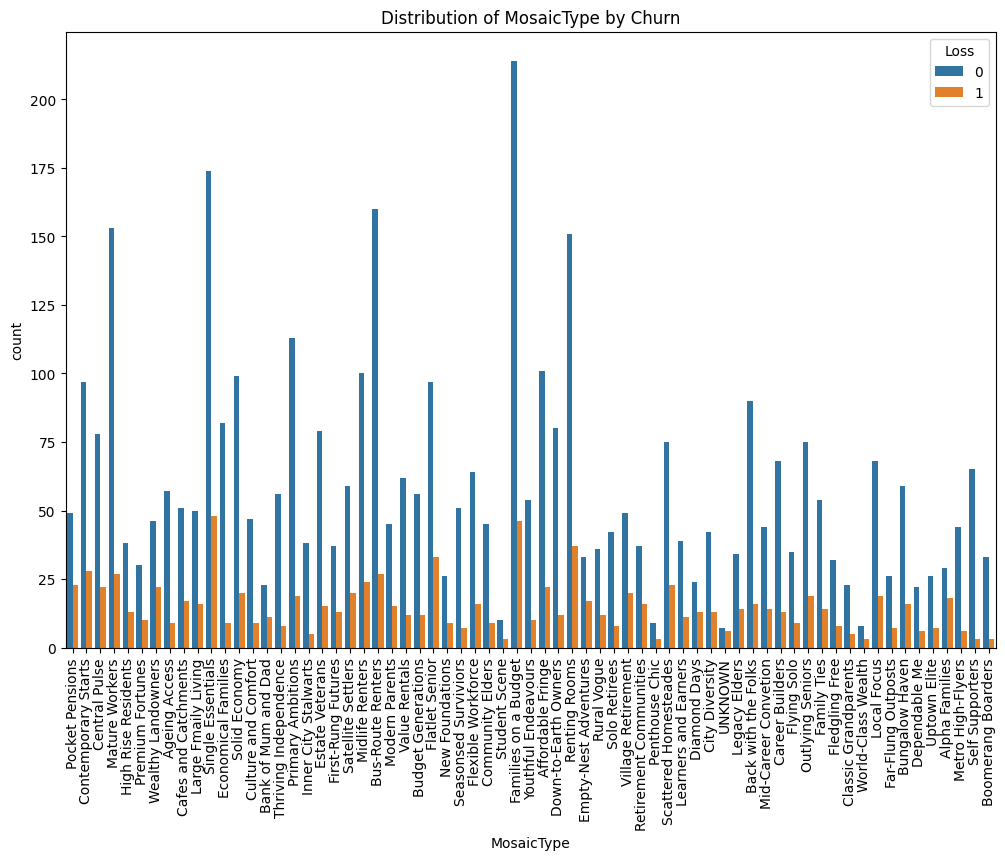

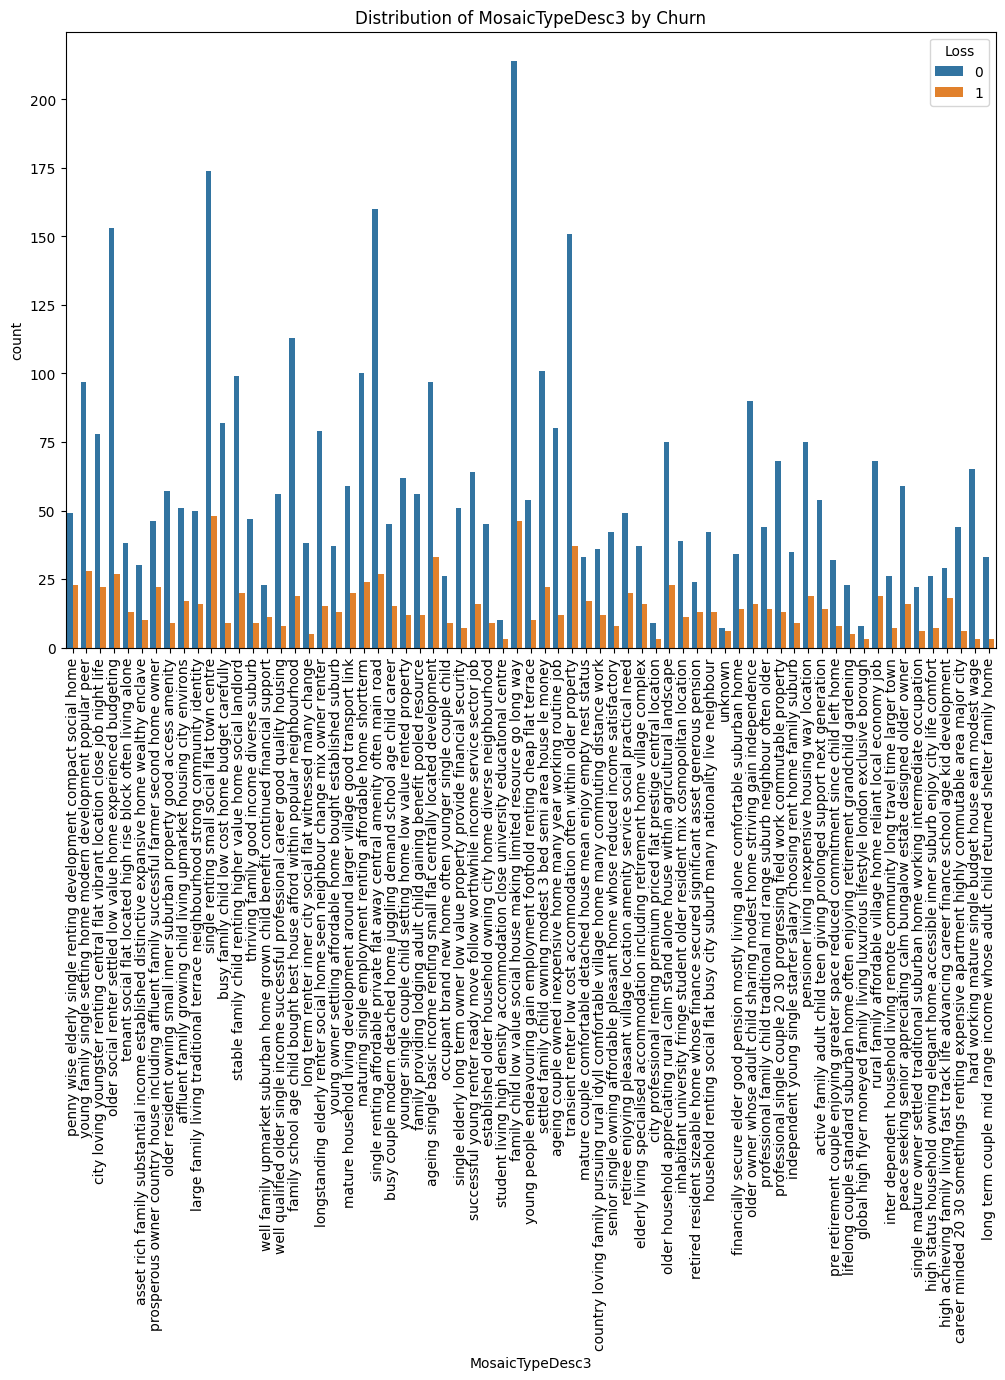

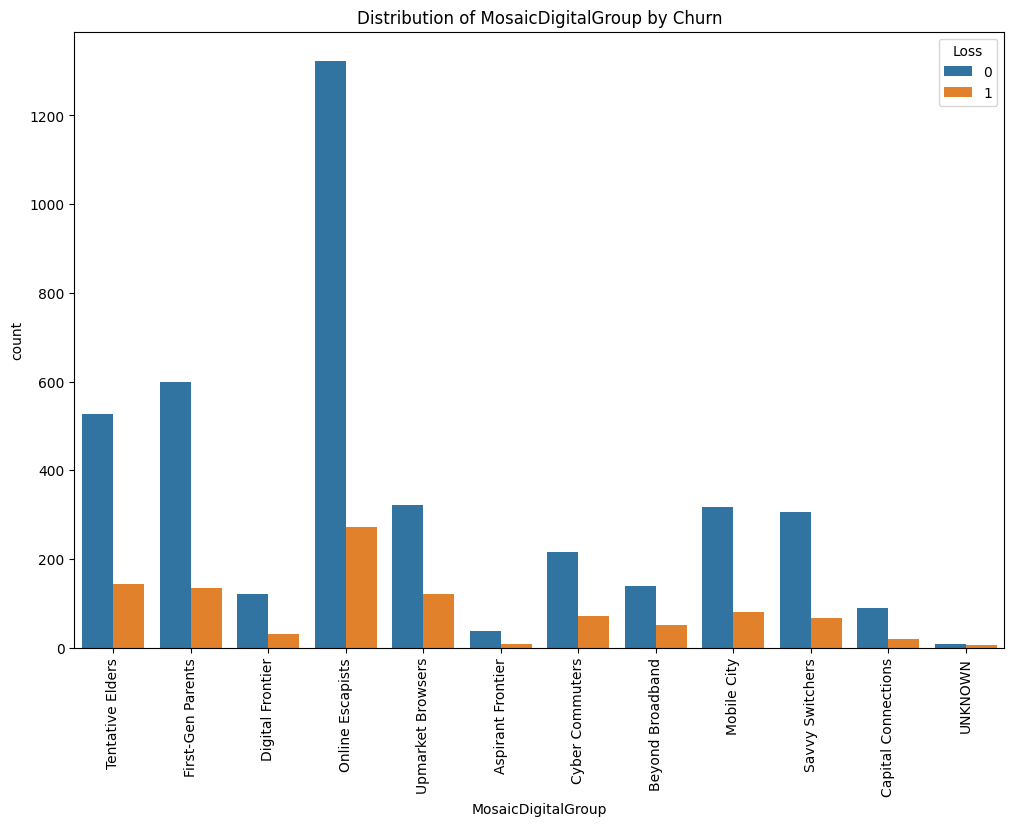

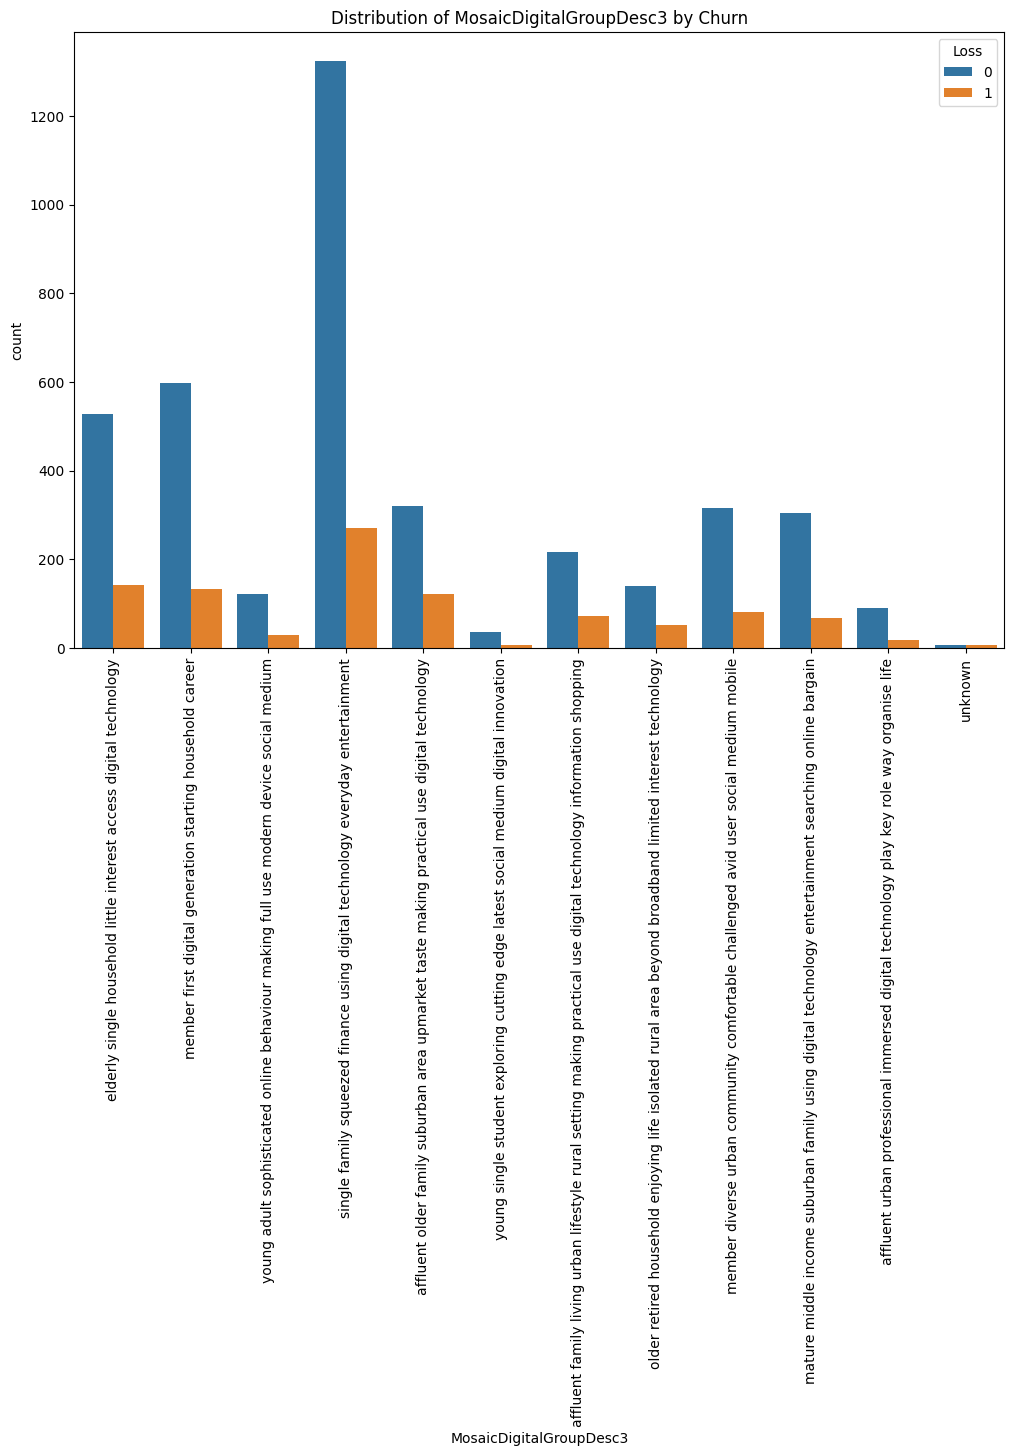

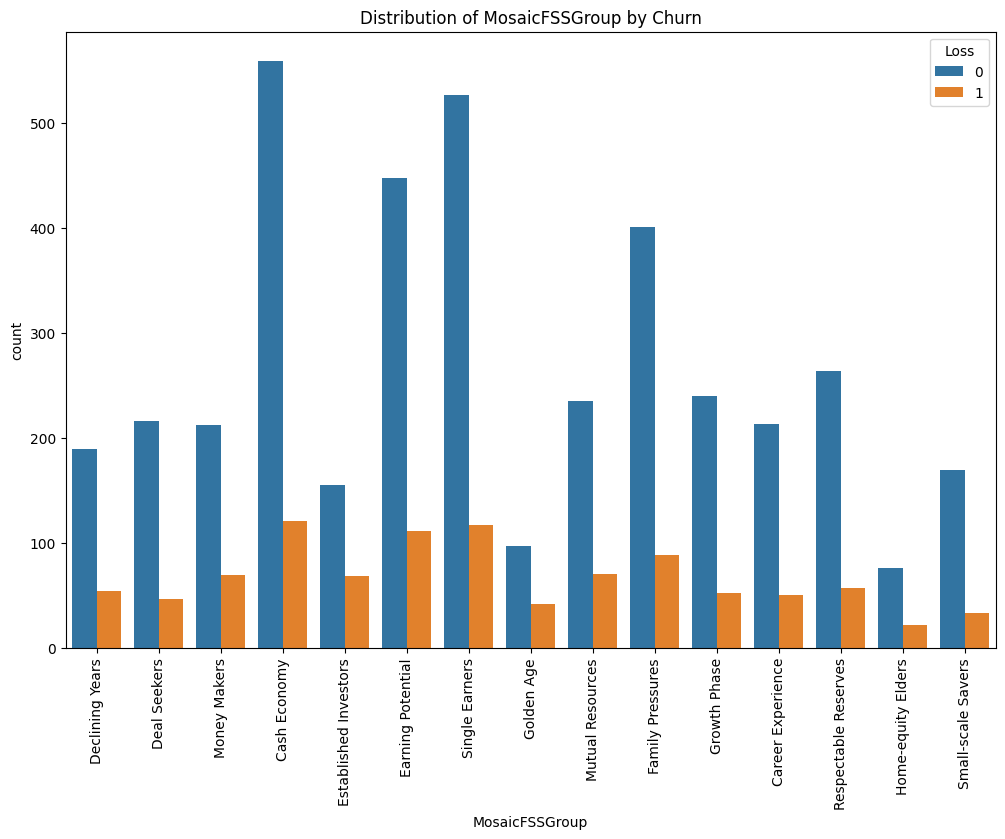

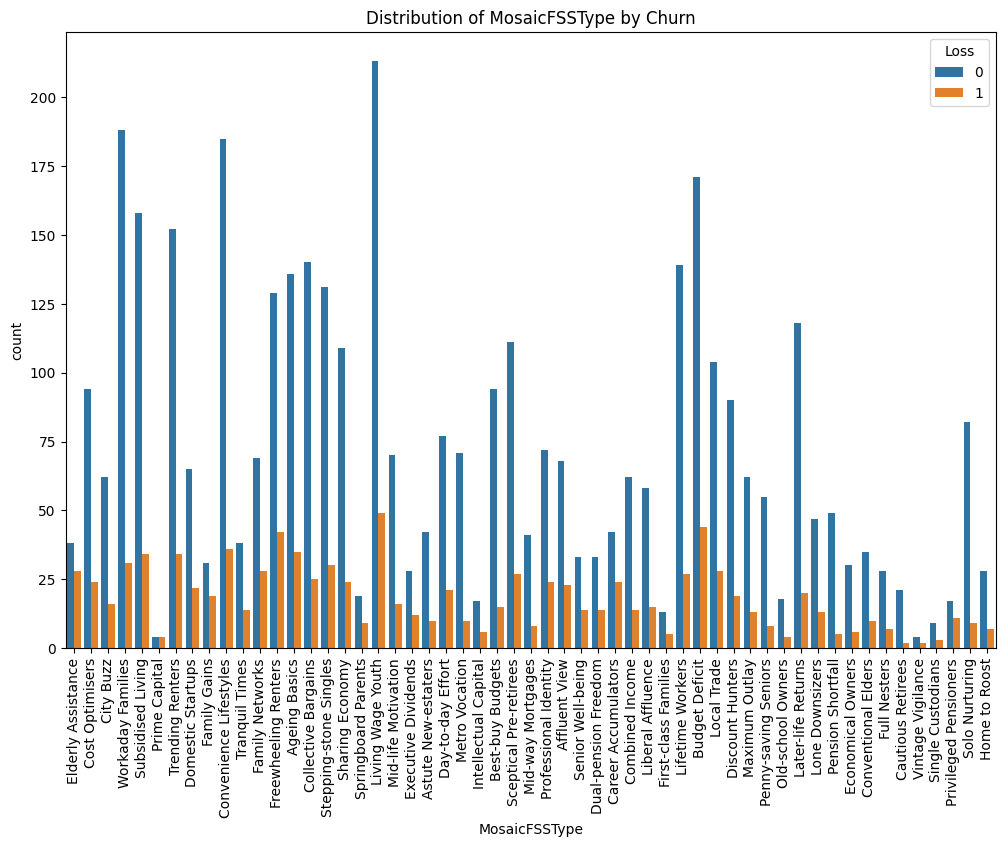

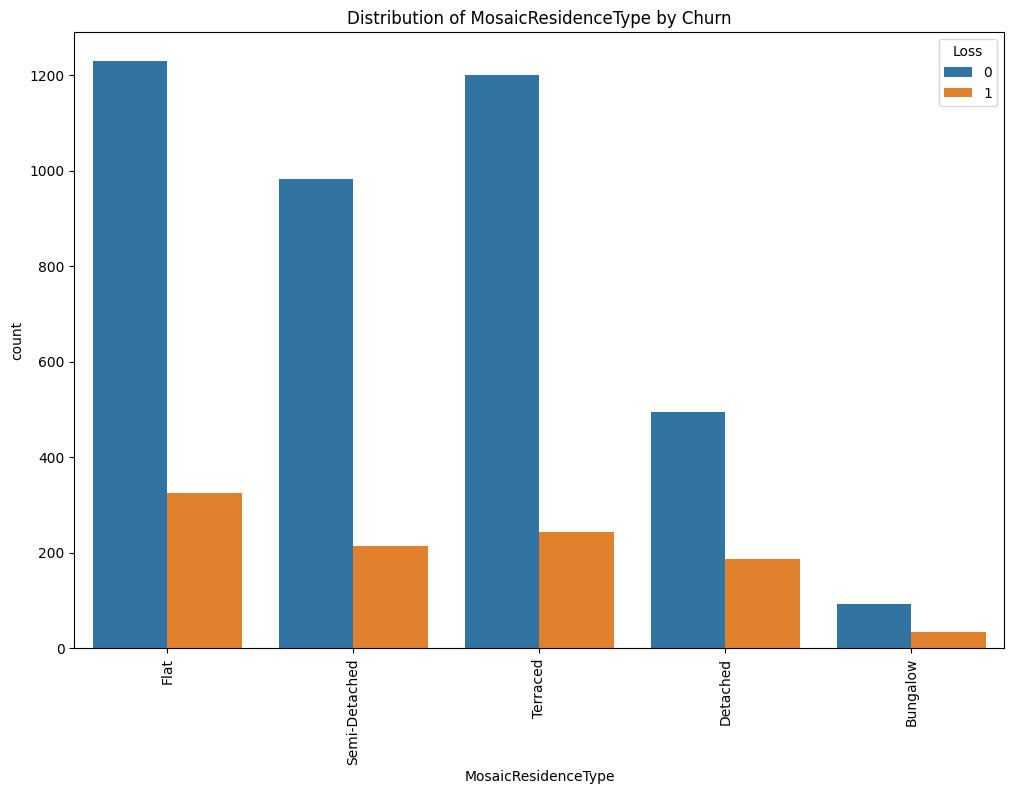

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features histograms
SPL_df[['OffsetValue', 'MosaicHouseholdIncValue', 'MosaicNoAdultsHousehold']].hist(bins=30, figsize=(12, 8))
plt.show()

# Categorical features distribution by churn
categorical_features = [
    'AccountDeterminationGroup', 'InstallmentPlan', 'DebtPlanGroup',
    'PaymentFrequency', 'ComplaintType', 'StatusGrouping', 'CustomerCategory',
    'CustomerType', 'PreferredContactMethod', 'OfgemCodeRisk', 'MosaicGroup',
    'MosaicType', 'MosaicTypeDesc3', 'MosaicDigitalGroup', 'MosaicDigitalGroupDesc3',
    'MosaicFSSGroup', 'MosaicFSSType', 'MosaicResidenceType' # Changed 'MosaicTypeDesc' to 'MosaicTypeDesc3'
]

for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=SPL_df, x=feature, hue='Loss')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()


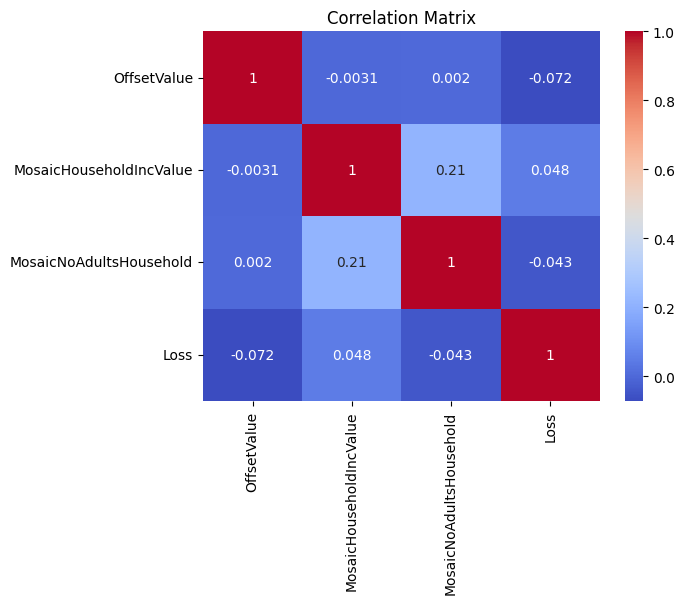

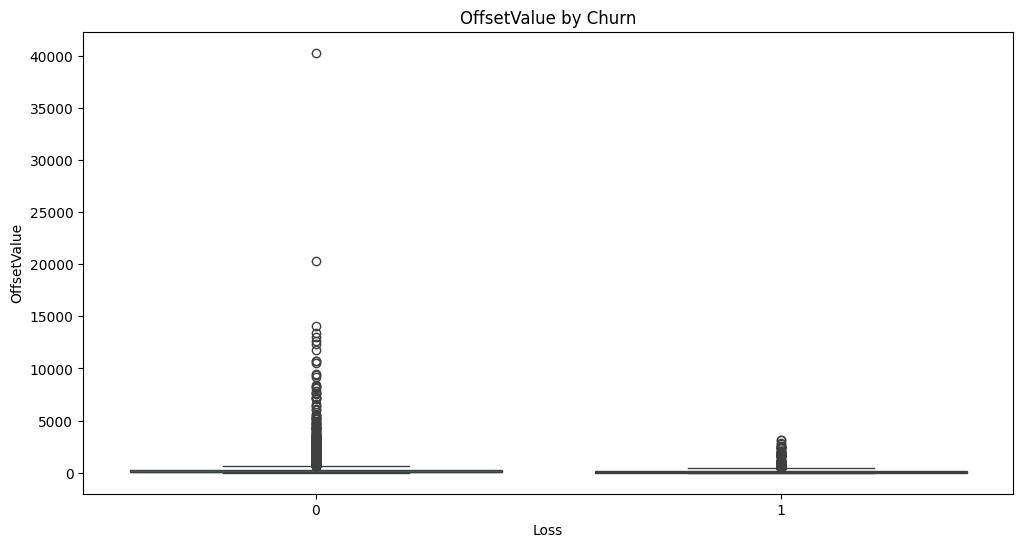

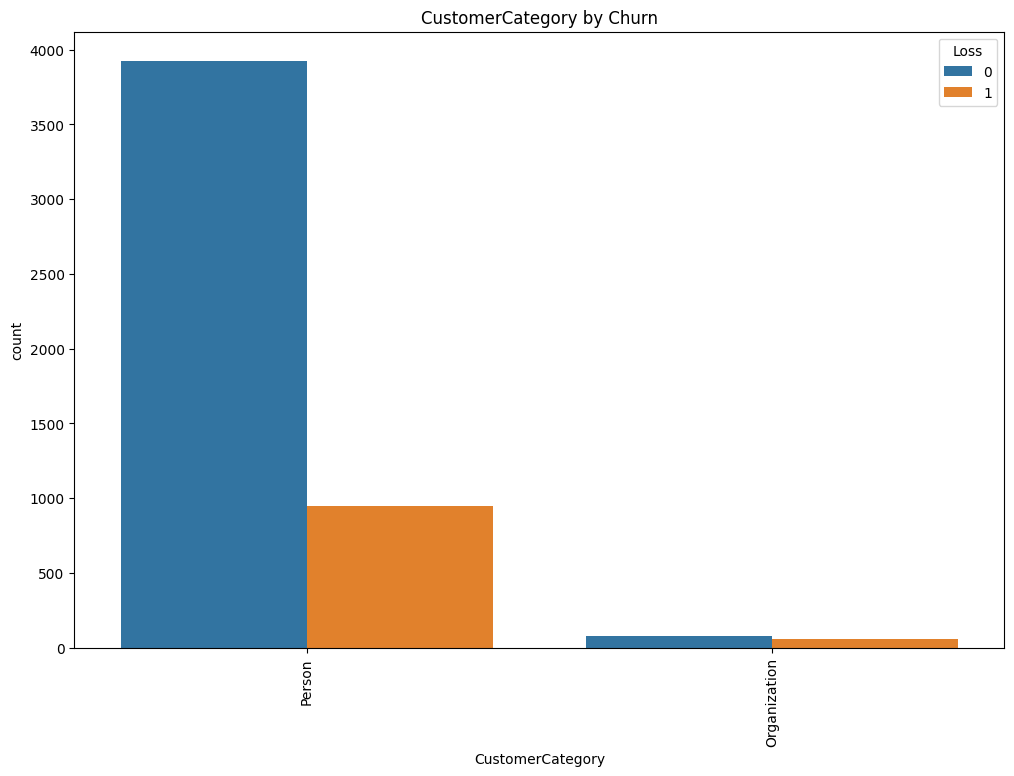

In [31]:
# Correlation matrix for numerical features
numerical_features = ['OffsetValue', 'MosaicHouseholdIncValue', 'MosaicNoAdultsHousehold', 'Loss']
corr_matrix = SPL_df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for numerical features by churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Loss', y='OffsetValue', data=SPL_df)
plt.title('OffsetValue by Churn')
plt.show()

# Count plots for a sample of categorical features
plt.figure(figsize=(12, 8))
sns.countplot(data=SPL_df, x='CustomerCategory', hue='Loss')
plt.xticks(rotation=90)
plt.title('CustomerCategory by Churn')
plt.show()


In [32]:
# Converting 'LossDate' and 'AccountStartdate' to datetime objects if they are not already
SPL_df['LossDate'] = pd.to_datetime(SPL_df['LossDate'], format='%d/%m/%Y')
SPL_df['AccountStartdate'] = pd.to_datetime(SPL_df['AccountStartdate']) # Assuming this is already in a compatible format

# Now calculate the duration
SPL_df['AccountDuration'] = (SPL_df['LossDate'] - SPL_df['AccountStartdate']).dt.days

# Encoding categorical features
SPL_df_encoded = pd.get_dummies(SPL_df, columns=[
    'AccountDeterminationGroup', 'InstallmentPlan', 'DebtPlanGroup',
    'PaymentFrequency', 'ComplaintType', 'StatusGrouping',
    'CustomerCategory', 'CustomerType', 'PreferredContactMethod',
    'OfgemCodeRisk', 'MosaicGroup', 'MosaicType', 'MosaicTypeDesc3',
    'MosaicDigitalGroup', 'MosaicDigitalGroupDesc3', 'MosaicFSSGroup',
    'MosaicFSSType', 'MosaicResidenceType'
])


**Segementation Analysis**

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Feature scaling
features = ['OffsetValue', 'MosaicHouseholdIncValue', 'MosaicNoAdultsHousehold']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(SPL_df[features])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
SPL_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Churn rate by cluster
churn_by_cluster = SPL_df.groupby('Cluster')['Loss'].mean()
print(churn_by_cluster)


Cluster
0    0.280702
1    0.182024
2    0.222146
3    0.000000
Name: Loss, dtype: float64


In [34]:
# Get the centroids (mean of features for each cluster)
centroids = kmeans.cluster_centers_
# Transform centroids back to the original scale for interpretation
centroids_original_scale = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_original_scale, columns=features)

print("Centroids of each cluster in original feature space:")
print(centroids_df)



Centroids of each cluster in original feature space:
   OffsetValue  MosaicHouseholdIncValue  MosaicNoAdultsHousehold
0   276.416045             95620.302267                 1.987406
1   274.001031             32571.819386                 2.064297
2   298.057006             25454.817498                 0.958305
3  8740.189111             35382.888889                 1.844444


In [35]:
# Calculate mean values of each feature for each cluster
cluster_means = SPL_df.groupby('Cluster')[features].mean()
print("Mean values of features for each cluster:")
print(cluster_means)


Mean values of features for each cluster:
         OffsetValue  MosaicHouseholdIncValue  MosaicNoAdultsHousehold
Cluster                                                               
0         279.373709             95462.085213                 1.987469
1         273.617928             32551.461041                 2.064339
2         298.057006             25454.817498                 0.958305
3        8740.189111             35382.888889                 1.844444


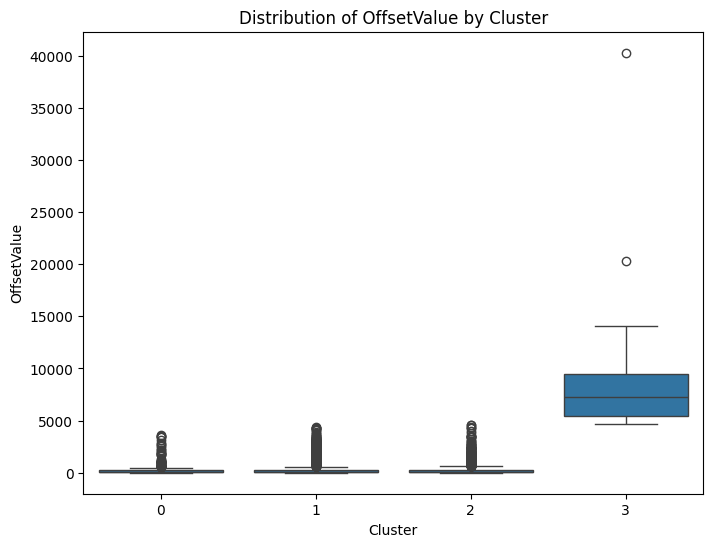

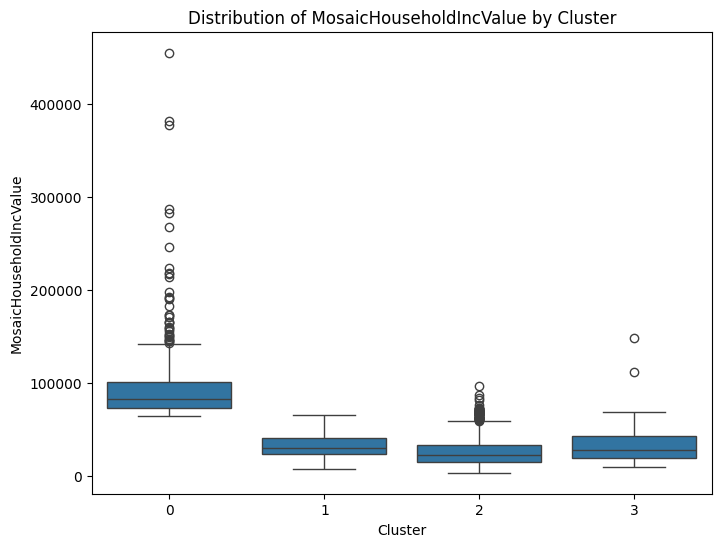

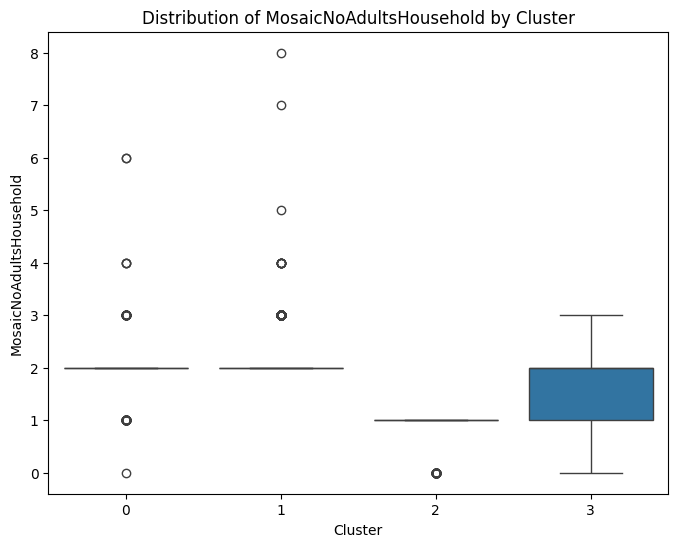

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=SPL_df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


Centroids of each cluster in original feature space:
   OffsetValue  MosaicHouseholdIncValue  MosaicNoAdultsHousehold
0   276.416045             95620.302267                 1.987406
1   274.001031             32571.819386                 2.064297
2   298.057006             25454.817498                 0.958305
3  8740.189111             35382.888889                 1.844444
Mean values of features for each cluster:
         OffsetValue  MosaicHouseholdIncValue  MosaicNoAdultsHousehold
Cluster                                                               
0         279.373709             95462.085213                 1.987469
1         273.617928             32551.461041                 2.064339
2         298.057006             25454.817498                 0.958305
3        8740.189111             35382.888889                 1.844444


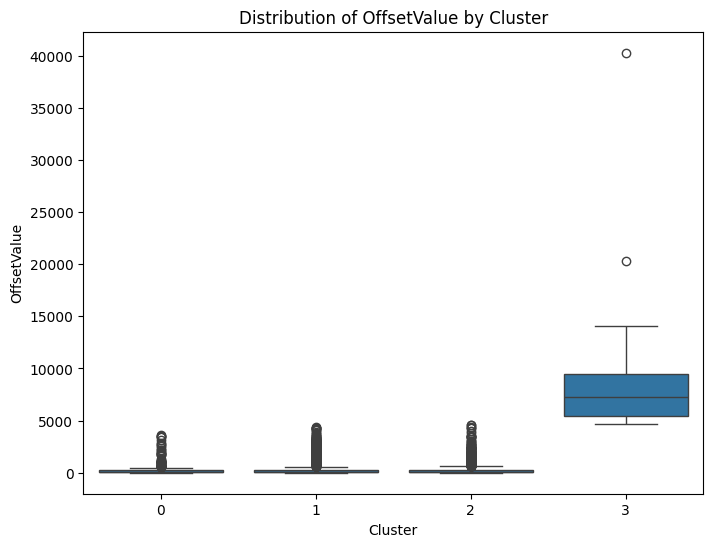

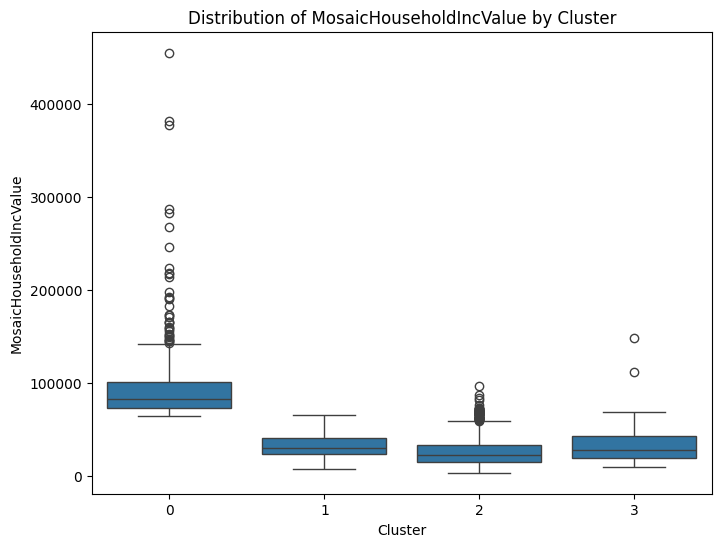

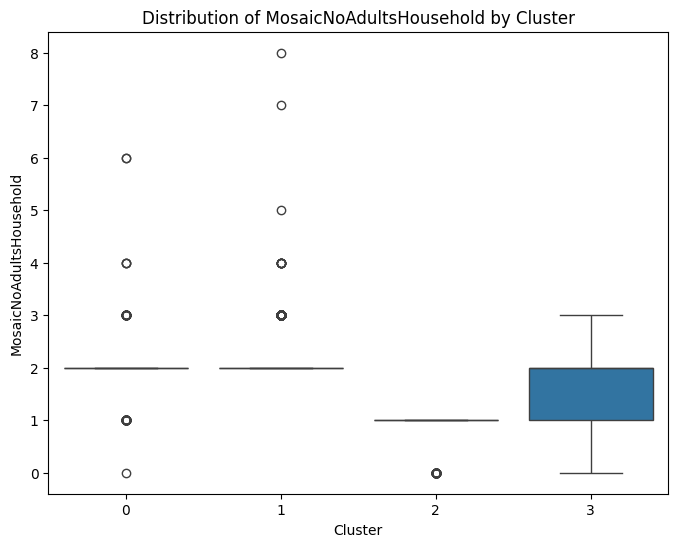

Churn rate by cluster:
Cluster
0    0.280702
1    0.182024
2    0.222146
3    0.000000
Name: Loss, dtype: float64


In [37]:
# 1. Examine centroids to understand feature values per cluster
centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Centroids of each cluster in original feature space:")
print(centroids_df)

# 2. Analyze the feature distribution across clusters
cluster_means = SPL_df.groupby('Cluster')[features].mean()
print("Mean values of features for each cluster:")
print(cluster_means)

# 3. Visualize feature distribution by cluster
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=SPL_df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

# 4. Analyze churn rate in relation to cluster features
churn_by_cluster = SPL_df.groupby('Cluster')['Loss'].mean()
print("Churn rate by cluster:")
print(churn_by_cluster)


**Summary Insights**

In [38]:
# Example: Print out insights
print(f'Overall Churn Rate: {churn_rate:.2%}')
print(f'Average Offset Value for Churned Customers: {SPL_df[SPL_df["Loss"] == 1]["OffsetValue"].mean()}')

# Additional insights can be printed based on the findings from previous steps


Overall Churn Rate: 20.00%
Average Offset Value for Churned Customers: 197.74681


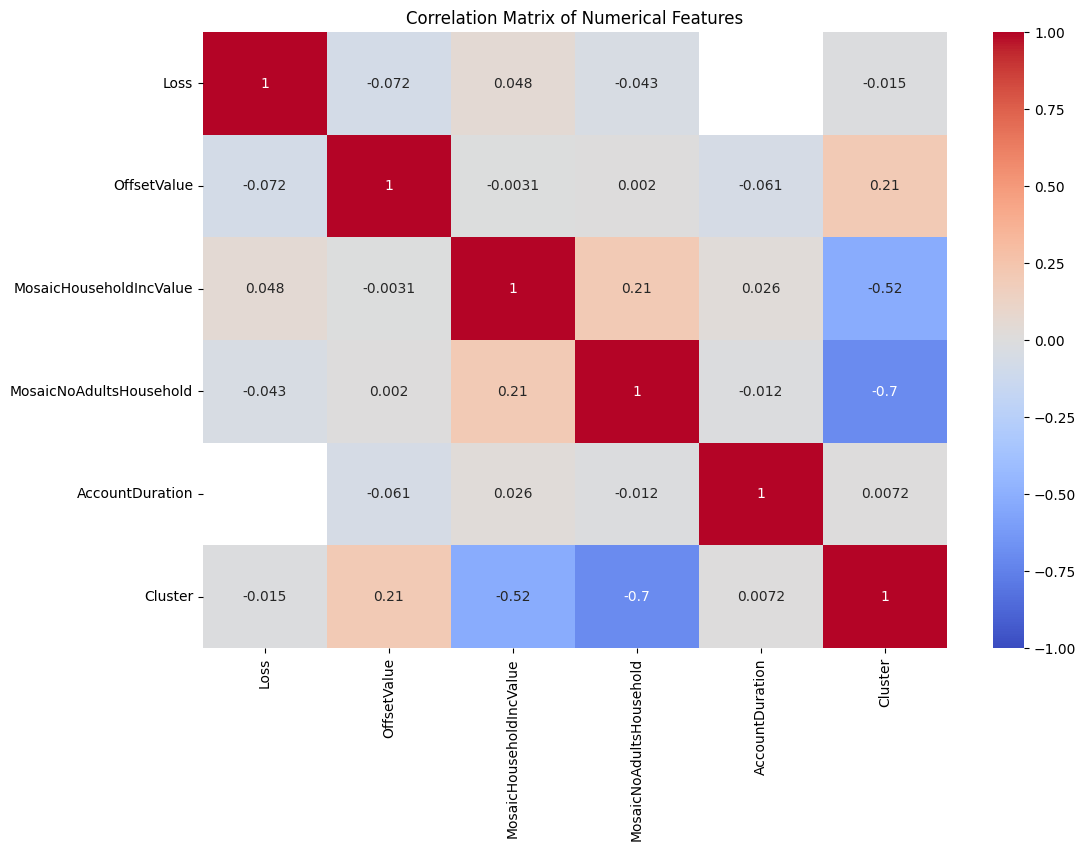

In [39]:
# Correlation matrix
# Select only numerical columns for correlation analysis
numerical_df = SPL_df.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [40]:
!pip install dython
import dython
from dython.nominal import associations

In [41]:
del SPL_df['AccountDuration']

In [42]:
del SPL_df['Cluster']

**Feature Importances**

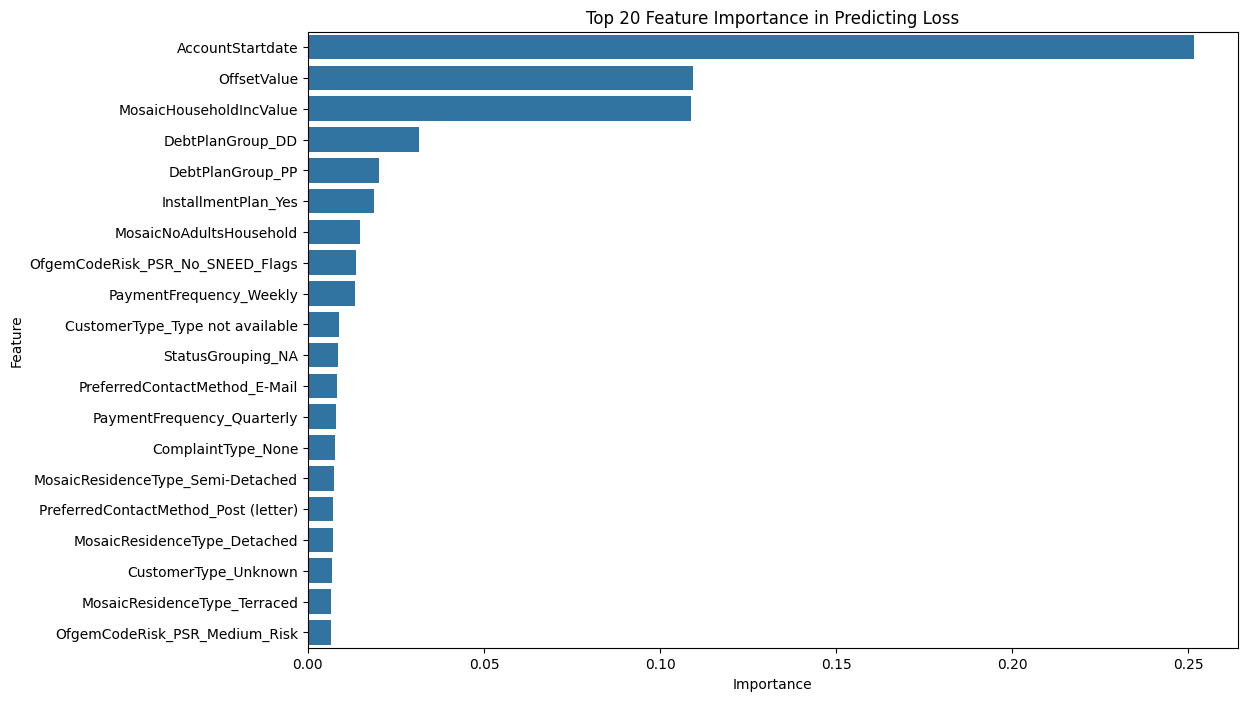

                                  Feature  Importance
0                        AccountStartdate    0.251483
1                             OffsetValue    0.109437
2                 MosaicHouseholdIncValue    0.108784
6                        DebtPlanGroup_DD    0.031577
7                        DebtPlanGroup_PP    0.020105
5                     InstallmentPlan_Yes    0.018687
3                 MosaicNoAdultsHousehold    0.014705
37       OfgemCodeRisk_PSR_No_SNEED_Flags    0.013673
9                 PaymentFrequency_Weekly    0.013476
30        CustomerType_Type not available    0.008853
12                      StatusGrouping_NA    0.008459
33          PreferredContactMethod_E-Mail    0.008225
8              PaymentFrequency_Quarterly    0.007914
10                     ComplaintType_None    0.007565
201     MosaicResidenceType_Semi-Detached    0.007524
34   PreferredContactMethod_Post (letter)    0.007252
199          MosaicResidenceType_Detached    0.007177
31                   Custome

In [43]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data by encoding categorical variables and filling missing values
SPL_df_encoded = pd.get_dummies(SPL_df, drop_first=True)

# Convert 'AccountStartdate' to numerical features (e.g., days since a reference date)
SPL_df_encoded['AccountStartdate'] = (SPL_df_encoded['AccountStartdate'] - pd.to_datetime('today')).dt.days

del SPL_df_encoded['LossDate']

X = SPL_df_encoded.drop('Loss', axis=1)
y = SPL_df_encoded['Loss']

# Fit a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for the features and their importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance and select top 20 features
top_20_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features)
plt.title('Top 20 Feature Importance in Predicting Loss')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the top 20 features
print(top_20_features)


**MSE and R² Score**

 MSE measures the average squared difference between the predicted values and the actual values. It gives an idea of how close the predictions are to the actual outcomes.
 The R² Score, or coefficient of determination, indicates how well the model explains the variance in the target variable. It ranges from 0 to 1, where:
0 means the model does not explain any of the variance (i.e., the predictions are as bad as simply predicting the mean of the target variable).
1 means the model explains all the variance.


In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.12805810414115645
R² Score: 0.24379898820651202


MSE of 0.128 indicates the average squared error of the model’s predictions. A lower value is better, but what is considered "low" depends on the problem domain.
R² Score of 0.244 indicates that the model explains around 24.4% of the variance in the target variable. This suggests that there is considerable room for improvement in model performance

**Further Modelling**

In [46]:
del SPL_df['LossDate']

In [47]:
SPL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Loss                       5000 non-null   int64         
 1   AccountStartdate           5000 non-null   datetime64[ns]
 2   AccountDeterminationGroup  5000 non-null   object        
 3   InstallmentPlan            5000 non-null   object        
 4   OffsetValue                5000 non-null   float64       
 5   DebtPlanGroup              5000 non-null   object        
 6   PaymentFrequency           5000 non-null   object        
 7   ComplaintType              5000 non-null   object        
 8   StatusGrouping             5000 non-null   object        
 9   CustomerCategory           5000 non-null   object        
 10  CustomerType               5000 non-null   object        
 11  PreferredContactMethod     5000 non-null   object        
 12  OfgemC

In [48]:
print(list(SPL_df.columns))


['Loss', 'AccountStartdate', 'AccountDeterminationGroup', 'InstallmentPlan', 'OffsetValue', 'DebtPlanGroup', 'PaymentFrequency', 'ComplaintType', 'StatusGrouping', 'CustomerCategory', 'CustomerType', 'PreferredContactMethod', 'OfgemCodeRisk', 'MosaicGroup', 'MosaicType', 'MosaicDigitalGroup', 'MosaicFSSGroup', 'MosaicFSSType', 'MosaicHouseholdIncValue', 'MosaicResidenceType', 'MosaicNoAdultsHousehold', 'MosaicTypeDesc3', 'MosaicDigitalGroupDesc3']


In [49]:
X = SPL_df[['AccountDeterminationGroup', 'InstallmentPlan', 'OffsetValue', 'DebtPlanGroup', 'PaymentFrequency', 'ComplaintType', 'StatusGrouping', 'CustomerCategory', 'CustomerType', 'PreferredContactMethod', 'OfgemCodeRisk', 'MosaicGroup', 'MosaicType', 'MosaicDigitalGroup', 'MosaicFSSGroup', 'MosaicFSSType', 'MosaicHouseholdIncValue', 'MosaicResidenceType', 'MosaicNoAdultsHousehold', 'MosaicTypeDesc3', 'MosaicDigitalGroupDesc3']]
y = SPL_df['Loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)


In [50]:
cat_columns = ['AccountDeterminationGroup', 'InstallmentPlan', 'DebtPlanGroup', 'PaymentFrequency', 'ComplaintType', 'StatusGrouping', 'CustomerCategory', 'CustomerType', 'PreferredContactMethod', 'OfgemCodeRisk', 'MosaicGroup', 'MosaicType', 'MosaicDigitalGroup', 'MosaicFSSGroup', 'MosaicFSSType', 'MosaicHouseholdIncValue', 'MosaicResidenceType', 'MosaicTypeDesc3', 'MosaicDigitalGroupDesc3']
num_columns = ['OffsetValue', 'MosaicNoAdultsHousehold', 'MosaicHouseholdIncValue']


In [51]:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,cat_columns),
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

In [52]:


pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

pipe_XGB = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBClassifier())
])


**Logistic Regression**

In [53]:
pipe_logreg.fit(X_train, y_train)
y_pred_logreg_base =  pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [54]:
from sklearn.metrics import f1_score # Make sure to import the function

recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base) # Now this line should work
acc_logreg_base_train = accuracy_score(y_train, y_pred_logreg_base_train)


In [55]:
print(f"Training Accuracy : {acc_logreg_base_train}")
print(f"Testing Accuracy : {acc_logreg_base}")

# we see here that the model is not over fit or underfitting using logistic regression model

Training Accuracy : 0.87775
Testing Accuracy : 0.797


In [56]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_logreg_base

Prediction 1  Prediction 0
actual 1            27           173
actual 0            30           770

<Axes: >

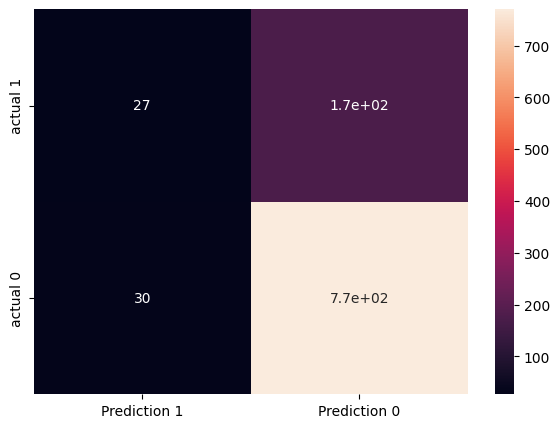

In [57]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)

**Random Forest**

In [58]:
pipe_RF.fit(X_train, y_train)
y_pred_RF_base =  pipe_RF.predict(X_test)
y_pred_RF_base_train = pipe_RF.predict(X_train)

In [59]:
recall_RF_base = recall_score(y_test, y_pred_RF_base)
acc_RF_base = accuracy_score(y_test, y_pred_RF_base)
precision_RF_base = precision_score(y_test, y_pred_RF_base)
f1_RF_base = f1_score(y_test, y_pred_RF_base)
acc_RF_base_train = accuracy_score(y_train, y_pred_RF_base_train)

print(f"Training Accuracy : {acc_RF_base_train}")
print(f"Testing Accuracy : {acc_RF_base}")


Training Accuracy : 0.999
Testing Accuracy : 0.804


In [60]:
print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       800
           1       0.56      0.10      0.16       200

    accuracy                           0.80      1000
   macro avg       0.69      0.54      0.53      1000
weighted avg       0.76      0.80      0.74      1000



In [61]:
cm_RF_base = confusion_matrix(y_test, y_pred_RF_base, labels = [1,0])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_RF_base

Prediction 1  Prediction 0
actual 1            19           181
actual 0            15           785

<Axes: >

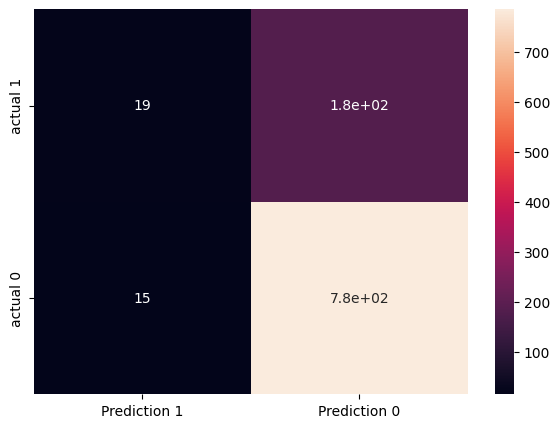

In [62]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_RF_base, annot = True)

**XGBoost**

In [63]:
pipe_XGB.fit(X_train, y_train)
y_pred_XGB_base =  pipe_XGB.predict(X_test)
y_pred_XGB_base_train = pipe_XGB.predict(X_train)

In [64]:
recall_XGB_base = recall_score(y_test, y_pred_XGB_base)
acc_XGB_base = accuracy_score(y_test, y_pred_XGB_base)
precision_XGB_base = precision_score(y_test, y_pred_XGB_base)
f1_XGB_base = f1_score(y_test, y_pred_XGB_base)
acc_XGB_base_train = accuracy_score(y_train, y_pred_XGB_base_train)

print(f"Training Accuracy : {acc_XGB_base_train}")
print(f"Testing Accuracy : {acc_XGB_base}")

Training Accuracy : 0.92425
Testing Accuracy : 0.786


In [65]:
print(classification_report(y_test, y_pred_XGB_base))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       800
           1       0.42      0.19      0.26       200

    accuracy                           0.79      1000
   macro avg       0.62      0.56      0.57      1000
weighted avg       0.74      0.79      0.75      1000



In [66]:
cm_XGB_base = confusion_matrix(y_test, y_pred_XGB_base, labels = [1,0])
df_XGB_base = pd.DataFrame(data = cm_XGB_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_XGB_base

Prediction 1  Prediction 0
actual 1            38           162
actual 0            52           748

<Axes: >

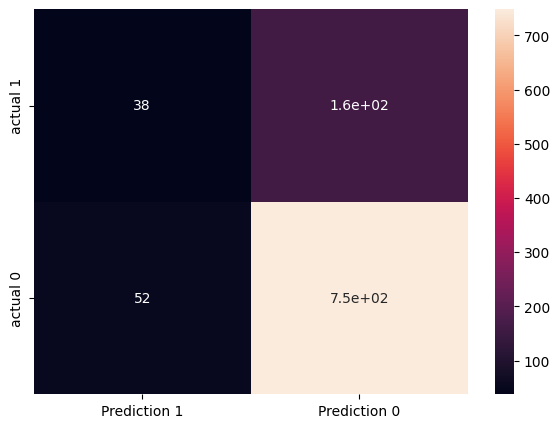

In [67]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_XGB_base, annot = True)

**Decision Tree**

In [68]:
pipe_DT.fit(X_train, y_train)
y_pred_DT_base =  pipe_DT.predict(X_test)
y_pred_DT_base_train = pipe_DT.predict(X_train)

In [69]:
recall_DT_base = recall_score(y_test, y_pred_DT_base)
acc_DT_base = accuracy_score(y_test, y_pred_DT_base)
precision_DT_base = precision_score(y_test, y_pred_DT_base)
f1_DT_base = f1_score(y_test, y_pred_DT_base)
acc_DT_base_train = accuracy_score(y_train, y_pred_DT_base_train)

print(f"Training Accuracy : {acc_DT_base_train}")
print(f"Testing Accuracy : {acc_DT_base}")

# we see that there's overfitting condition in Decision Tree as well
# however we will try to adjust the parameter to prevent the overfitting condition

Training Accuracy : 0.99925
Testing Accuracy : 0.786


In [70]:
print(classification_report(y_test, y_pred_DT_base))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       800
           1       0.45      0.30      0.36       200

    accuracy                           0.79      1000
   macro avg       0.64      0.61      0.62      1000
weighted avg       0.76      0.79      0.77      1000



In [71]:
cm_DT_base = confusion_matrix(y_test, y_pred_DT_base, labels = [1,0])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_DT_base

Prediction 1  Prediction 0
actual 1            61           139
actual 0            75           725

<Axes: >

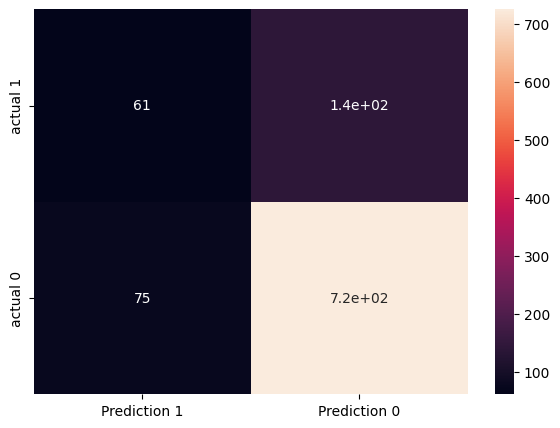

In [72]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_DT_base, annot = True)

**KNN**

In [73]:
pipe_KNN.fit(X_train, y_train)
y_pred_KNN_base =  pipe_KNN.predict(X_test)
y_pred_KNN_base_train = pipe_KNN.predict(X_train)

In [74]:
recall_KNN_base = recall_score(y_test, y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
precision_KNN_base = precision_score(y_test, y_pred_KNN_base)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)
acc_KNN_base_train = accuracy_score(y_train, y_pred_KNN_base_train)

print(f"Training Accuracy : {acc_KNN_base_train}")
print(f"Testing Accuracy : {acc_KNN_base}")



Training Accuracy : 0.8325
Testing Accuracy : 0.783


In [75]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       800
           1       0.42      0.24      0.31       200

    accuracy                           0.78      1000
   macro avg       0.63      0.58      0.59      1000
weighted avg       0.75      0.78      0.76      1000



In [76]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels = [1,0])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_KNN_base

Prediction 1  Prediction 0
actual 1            48           152
actual 0            65           735

<Axes: >

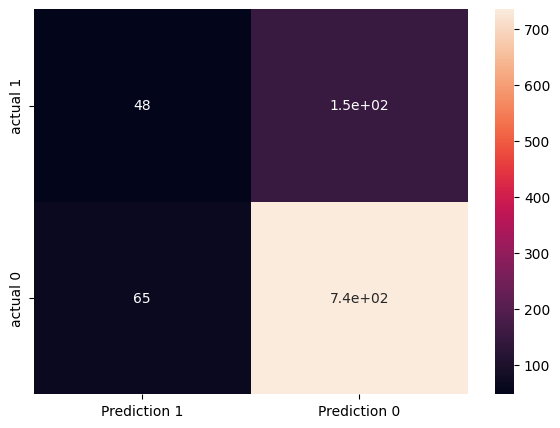

In [77]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_KNN_base, annot = True)

**Comparing and Evaluating Model Performance**

In [78]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [79]:
evaluation_matrix_base = {
    'Logistic Regression': [acc_logreg_base, recall_logreg_base, precision_logreg_base, f1_logreg_base],
    'KNN':[acc_KNN_base,recall_KNN_base,precision_KNN_base, f1_KNN_base],
    'Decision Tree':[acc_DT_base, recall_DT_base, precision_DT_base, f1_DT_base],
    'Random Forest':[acc_RF_base, recall_RF_base, precision_RF_base, f1_RF_base],
    'XGB':[acc_XGB_base, recall_XGB_base, precision_XGB_base, f1_XGB_base]
}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_base_training = {
    "training" : [acc_logreg_base_train, acc_KNN_base_train, acc_DT_base_train, acc_RF_base_train, acc_XGB_base_train],
    "testing": [acc_logreg_base, acc_KNN_base, acc_DT_base, acc_RF_base, acc_XGB_base]
}


eva_base_train = pd.DataFrame(data = evaluation_matrix_base_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'XGB'])

display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])


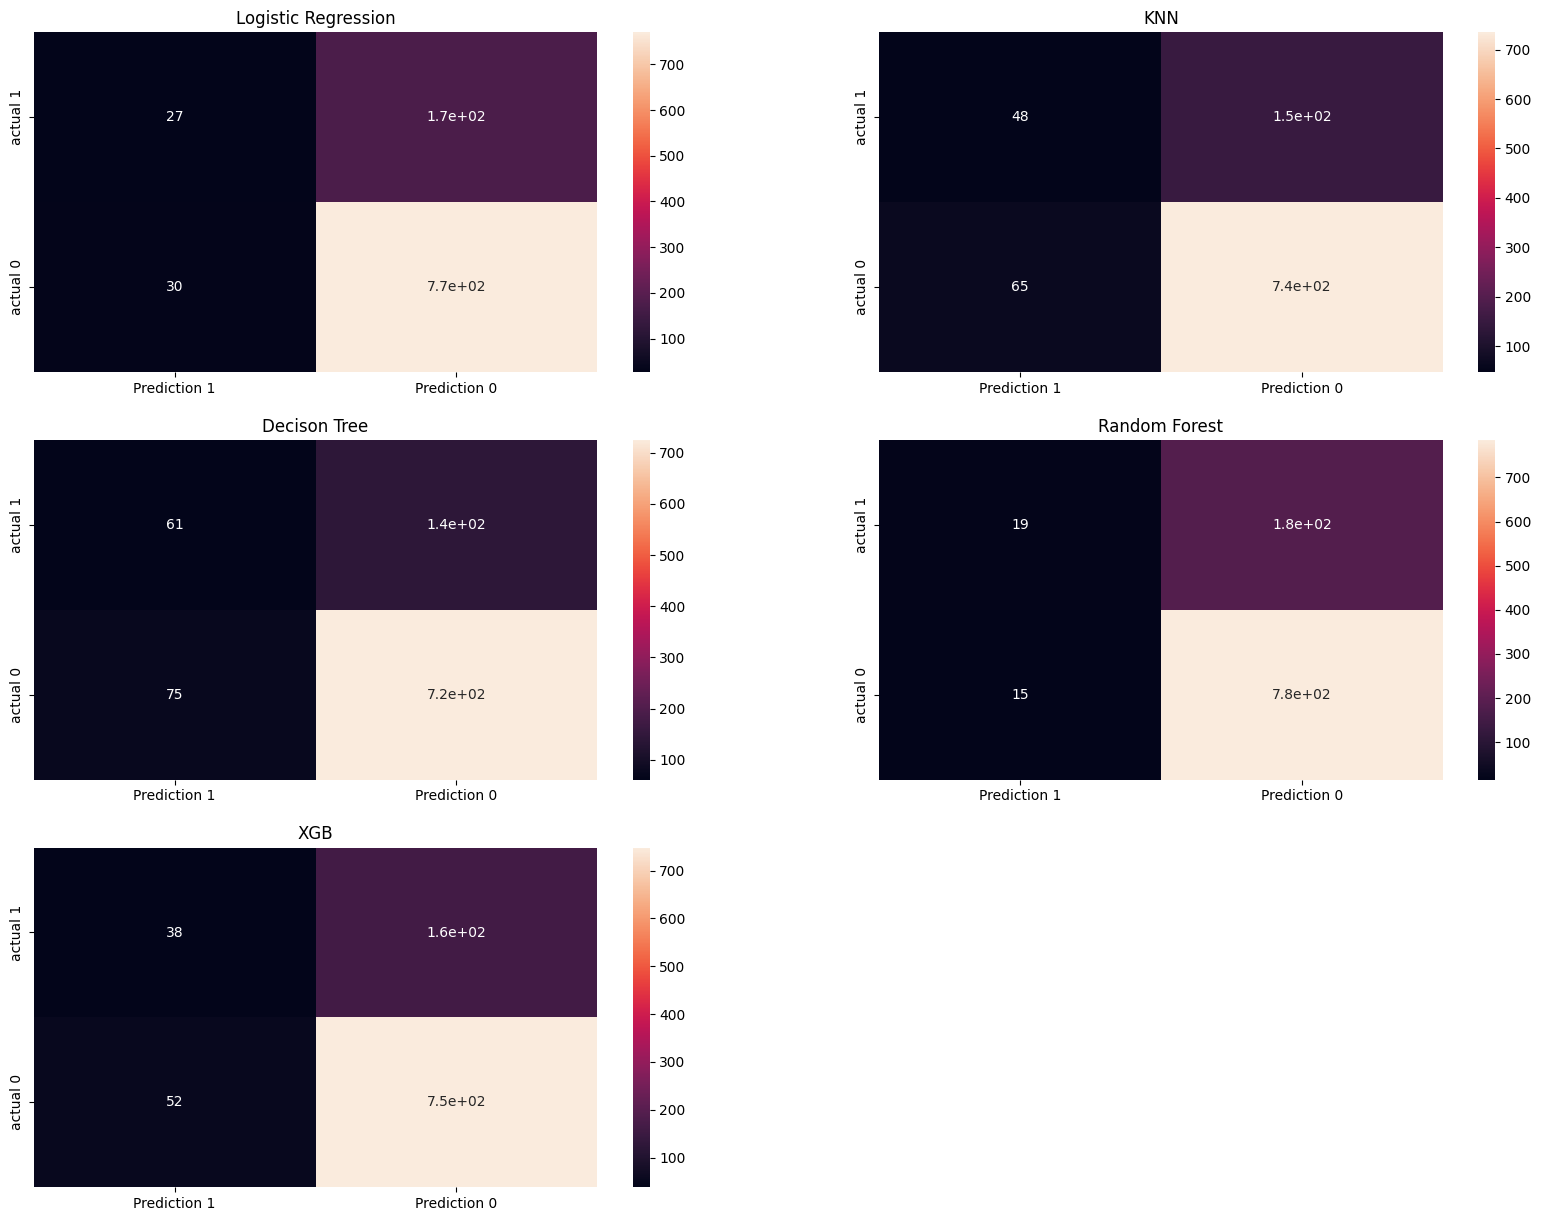

In [80]:
# confusion Matrix Figure For All The Chart

plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_base, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(df_KNN_base, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_DT_base, annot = True)
plt.title('Decison Tree')

plt.subplot(3,2,4)
sns.heatmap(df_RF_base, annot = True)
plt.title('Random Forest')

plt.subplot(3,2,5)
sns.heatmap(df_XGB_base, annot = True)
plt.title("XGB")

plt.show()

**HYPERPARAMETERS TUNING**

**Logistic Regression**

In [81]:
pipe_logreg.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['AccountDeterminationGroup',
                                     'InstallmentPlan', 'DebtPlanGroup',
                                     'PaymentFrequency', 'ComplaintType',
                                     'StatusGrouping', 'CustomerCategory',
                                     'CustomerType', 'PreferredContactMethod',
                                     'OfgemCodeRisk', 'MosaicGroup', 'MosaicType',
                                     'MosaicDigitalGroup', 'MosaicFSSGroup',
                                     'MosaicFSSType', 'MosaicHouseholdIncValue',
                                     'MosaicResidenceType', 'MosaicTypeDesc3',
                                     'MosaicDigitalGroupDesc3']),

In [82]:
param_logreg = {
    'algo__penalty':['l2', 'l1', 'elasticnet'],
    'algo__C':[1.0, 2.0, 3.0, 0.5, 0.1],
    'algo__class_weight':[None, 'balanced']
}

model_logreg = GridSearchCV(estimator=pipe_logreg, param_grid=param_logreg, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['AccountDeterminationGroup',
                                                                          'InstallmentPlan',
                                                                          'DebtPlanGroup',
                                                                          'PaymentFrequency',
                                                                          'ComplaintType',
                                                                          'StatusGrouping',
                                                                          'CustomerCategory',
                                                                          'CustomerType',
                                                                          'PreferredContactMethod',
                                                                          'OfgemCo...
                                                                          'MosaicDigitalGroupDesc3']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['OffsetValue',
                                                                          'MosaicNoAdultsHousehold',
                                                                          'MosaicHouseholdIncValue'])])),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__C': [1.0, 2.0, 3.0, 0.5, 0.1],
                         'algo__class_weight': [None, 'balanced'],
                         'algo__penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [83]:
logreg_tuned = model_logreg.best_estimator_
logreg_tuned_train = model_logreg.best_score_
y_pred_logreg_tuned = logreg_tuned.predict(X_test)

In [84]:
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
f1_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned_train = logreg_tuned_train

print(f"Training Accuracy : {acc_logreg_tuned_train}")
print(f"Testing Accuracy : {acc_logreg_tuned}")

Training Accuracy : 0.8057505380842963
Testing Accuracy : 0.798


In [85]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       800
           1       0.48      0.14      0.22       200

    accuracy                           0.80      1000
   macro avg       0.65      0.55      0.55      1000
weighted avg       0.75      0.80      0.75      1000



In [86]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])


display_side_by_side([df_logreg_base, df_logreg_tuned], ['Base Model', 'Tuned Model'])

Text(0.5, 1.0, 'Tuned Model')

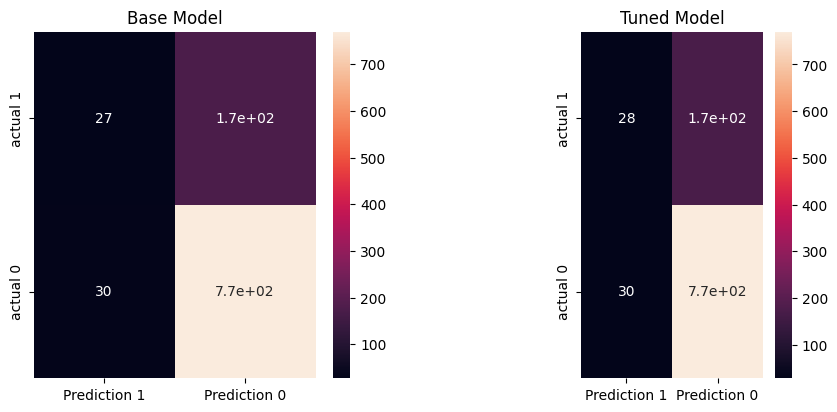

In [87]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_logreg_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_logreg_tuned, annot = True)
plt.title('Tuned Model')

**KNN**

In [88]:
pipe_KNN.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['AccountDeterminationGroup',
                                     'InstallmentPlan', 'DebtPlanGroup',
                                     'PaymentFrequency', 'ComplaintType',
                                     'StatusGrouping', 'CustomerCategory',
                                     'CustomerType', 'PreferredContactMethod',
                                     'OfgemCodeRisk', 'MosaicGroup', 'MosaicType',
                                     'MosaicDigitalGroup', 'MosaicFSSGroup',
                                     'MosaicFSSType', 'MosaicHouseholdIncValue',
                                     'MosaicResidenceType', 'MosaicTypeDesc3',
                                     'MosaicDigitalGroupDesc3']),

In [89]:
param_KNN = {
    'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
    'algo__weights':['uniform', 'distance'],
    'algo__p':[2,1]
}

model_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_KNN, cv = 3, n_jobs = -1, verbose = 1)
model_KNN.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['AccountDeterminationGroup',
                                                                          'InstallmentPlan',
                                                                          'DebtPlanGroup',
                                                                          'PaymentFrequency',
                                                                          'ComplaintType',
                                                                          'StatusGrouping',
                                                                          'CustomerCategory',
                                                                          'CustomerType',
                                                                          'PreferredContactMethod',
                                                                          'OfgemCo...
                                                                          'MosaicResidenceType',
                                                                          'MosaicTypeDesc3',
                                                                          'MosaicDigitalGroupDesc3']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['OffsetValue',
                                                                          'MosaicNoAdultsHousehold',
                                                                          'MosaicHouseholdIncValue'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
                         'algo__p': [2, 1],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [90]:
KNN_tuned = model_KNN.best_estimator_
KNN_tuned_train = model_KNN.best_score_
y_pred_KNN_tuned = KNN_tuned.predict(X_test)

In [91]:
recall_KNN_tuned = recall_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
precision_KNN_tuned = precision_score(y_test, y_pred_KNN_tuned)
f1_KNN_tuned = f1_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned_train = KNN_tuned_train

print(f"Training Accuracy : {acc_KNN_tuned_train}")
print(f"Testing Accuracy : {acc_KNN_tuned}")

Training Accuracy : 0.8007511623033196
Testing Accuracy : 0.8


In [92]:
print(classification_report(y_test, y_pred_KNN_tuned))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       800
           1       0.50      0.10      0.17       200

    accuracy                           0.80      1000
   macro avg       0.66      0.54      0.53      1000
weighted avg       0.75      0.80      0.74      1000



In [93]:
cm_KNN_tuned = confusion_matrix(y_test, y_pred_KNN_tuned, labels = [1,0])
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])


display_side_by_side([df_KNN_base, df_KNN_tuned], ['Base Model', 'Tuned Model'])

Text(0.5, 1.0, 'Tuned Model')

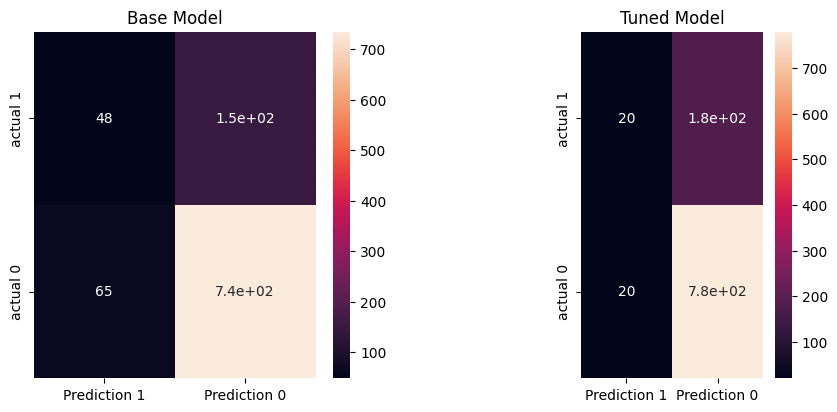

In [94]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_KNN_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_KNN_tuned, annot = True)
plt.title('Tuned Model')

**XGBoost**

In [95]:
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['AccountDeterminationGroup',
                                     'InstallmentPlan', 'DebtPlanGroup',
                                     'PaymentFrequency', 'ComplaintType',
                                     'StatusGrouping', 'CustomerCategory',
                                     'CustomerType', 'PreferredContactMethod',
                                     'OfgemCodeRisk', 'MosaicGroup', 'MosaicType',
                                     'MosaicDigitalGroup', 'MosaicFSSGroup',
                                     'MosaicFSSType', 'MosaicHouseholdIncValue',
                                     'MosaicResidenceType', 'MosaicTypeDesc3',
                                     'MosaicDigitalGroupDesc3']),

In [96]:
param_XGB = {
    'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
    'algo__max_depth': [6, 8, 10, 12],
    'algo__gamma':[0,1,2,3]
}

model_XGB = GridSearchCV(estimator=pipe_XGB, param_grid=param_XGB, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['AccountDeterminationGroup',
                                                                          'InstallmentPlan',
                                                                          'DebtPlanGroup',
                                                                          'PaymentFrequency',
                                                                          'ComplaintType',
                                                                          'StatusGrouping',
                                                                          'CustomerCategory',
                                                                          'CustomerType',
                                                                          'PreferredContactMethod',
                                                                          'OfgemCo...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'algo__gamma': [0, 1, 2, 3],
                         'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
                         'algo__max_depth': [6, 8, 10, 12]},
             scoring='accuracy', verbose=1)

In [97]:
XGB_tuned = model_XGB.best_estimator_
XGB_tuned_train = model_XGB.best_score_
y_pred_XGB_tuned = XGB_tuned.predict(X_test)

In [98]:
recall_XGB_tuned = recall_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned = accuracy_score(y_test, y_pred_XGB_tuned)
precision_XGB_tuned = precision_score(y_test, y_pred_XGB_tuned)
f1_XGB_tuned = f1_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned_train = XGB_tuned_train

print(f"Training Accuracy : {acc_XGB_tuned_train}")
print(f"Testing Accuracy : {acc_XGB_tuned}")


Training Accuracy : 0.8132490393962808
Testing Accuracy : 0.811


In [99]:
print(classification_report(y_test, y_pred_XGB_tuned))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       800
           1       0.59      0.18      0.28       200

    accuracy                           0.81      1000
   macro avg       0.71      0.58      0.59      1000
weighted avg       0.78      0.81      0.77      1000



In [100]:
cm_XGB_tuned = confusion_matrix(y_test, y_pred_XGB_tuned, labels = [1,0])
df_XGB_tuned = pd.DataFrame(data = cm_XGB_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])


display_side_by_side([df_XGB_base, df_XGB_tuned], ['Base Model', 'Tuned Model'])


Text(0.5, 1.0, 'Tuned Model')

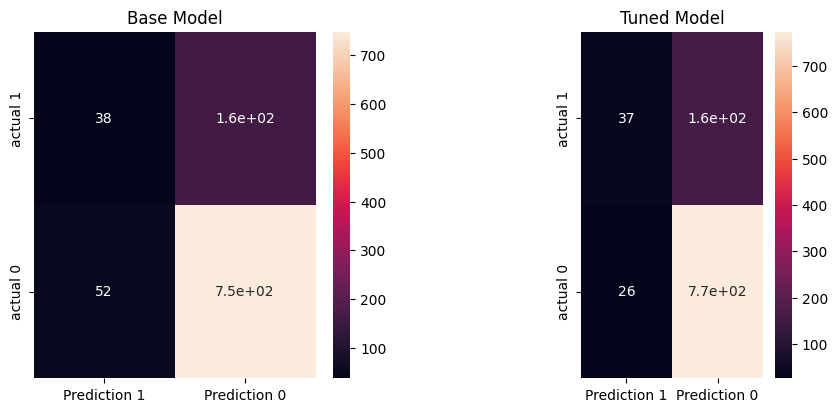

In [101]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_XGB_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_XGB_tuned, annot = True)
plt.title('Tuned Model')

**Random Forest**

In [102]:
param_RF = {
    'algo__min_samples_split': [2,3,4,6,8,10],
    'algo__max_depth': [None,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,8],
    'algo__max_leaf_nodes':[None, 1,2,4]
}

model_RF = GridSearchCV(estimator=pipe_RF, param_grid=param_RF, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['AccountDeterminationGroup',
                                                                          'InstallmentPlan',
                                                                          'DebtPlanGroup',
                                                                          'PaymentFrequency',
                                                                          'ComplaintType',
                                                                          'StatusGrouping',
                                                                          'CustomerCategory',
                                                                          'CustomerType',
                                                                          'PreferredContactMethod',
                                                                          'OfgemCo...
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['OffsetValue',
                                                                          'MosaicNoAdultsHousehold',
                                                                          'MosaicHouseholdIncValue'])])),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 12, 14, 18, 20],
                         'algo__max_leaf_nodes': [None, 1, 2, 4],
                         'algo__min_samples_leaf': [1, 2, 4, 8],
                         'algo__min_samples_split': [2, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [103]:
RF_tuned = model_RF.best_estimator_
RF_tuned_train = model_RF.best_score_
y_pred_RF_tuned = RF_tuned.predict(X_test)

In [104]:
recall_RF_tuned = recall_score(y_test, y_pred_RF_tuned)
acc_RF_tuned = accuracy_score(y_test, y_pred_RF_tuned)
precision_RF_tuned = precision_score(y_test, y_pred_RF_tuned)
f1_RF_tuned = f1_score(y_test, y_pred_RF_tuned)
acc_RF_tuned_train = RF_tuned_train

print(f"Training Accuracy : {acc_RF_tuned_train}")
print(f"Testing Accuracy : {acc_RF_tuned}")

Training Accuracy : 0.8074998509747378
Testing Accuracy : 0.806


In [105]:
print(classification_report(y_test, y_pred_RF_tuned))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       800
           1       0.61      0.09      0.15       200

    accuracy                           0.81      1000
   macro avg       0.71      0.54      0.52      1000
weighted avg       0.77      0.81      0.74      1000



In [106]:
cm_RF_tuned = confusion_matrix(y_test, y_pred_RF_tuned, labels = [1,0])
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])


display_side_by_side([df_RF_base, df_RF_tuned], ['Base Model', 'Tuned Model'])

Text(0.5, 1.0, 'Tuned Model')

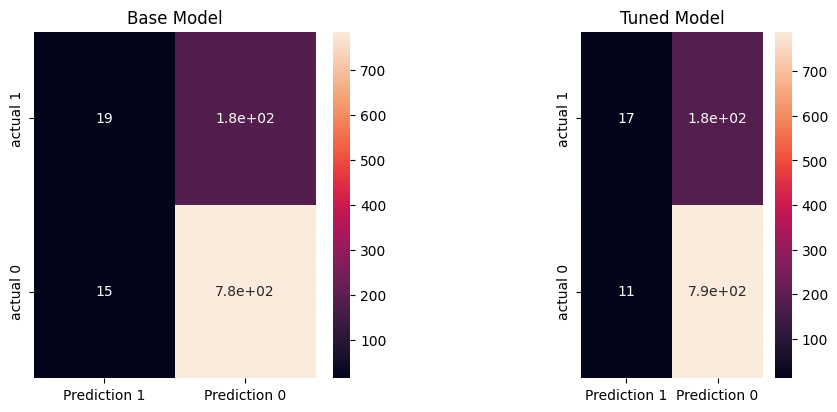

In [107]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_RF_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_RF_tuned, annot = True)
plt.title('Tuned Model')

**Putting the Tuned Models together**

In [108]:
evaluation_matrix_tuned = {
    'Logistic Regression': [acc_logreg_tuned, recall_logreg_tuned, precision_logreg_tuned, f1_logreg_tuned],
    'KNN':[acc_KNN_tuned,recall_KNN_tuned,precision_KNN_tuned, f1_KNN_tuned],
    #'Decision Tree':[acc_DT_tuned, recall_DT_tuned, precision_DT_tuned, f1_DT_tuned],
    'Random Forest':[acc_RF_tuned, recall_RF_tuned, precision_RF_tuned, f1_RF_tuned],
    'XGB':[acc_XGB_tuned, recall_XGB_tuned, precision_XGB_tuned, f1_XGB_tuned]
}

eva_tuned = pd.DataFrame(data = evaluation_matrix_tuned, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_tuned_training = {
    "training" : [acc_logreg_tuned_train, acc_KNN_tuned_train, acc_RF_tuned_train, acc_XGB_tuned_train],
    "testing": [acc_logreg_tuned, acc_KNN_tuned, acc_RF_tuned, acc_XGB_tuned]
}

eva_tuned_train = pd.DataFrame(data = evaluation_matrix_tuned_training, index = ['Logreg', 'KNN','Random Forest', 'XGB'])

**Tuned Model**

In [109]:
display_side_by_side([eva_tuned, eva_tuned_train], ['Evaluation Matrix', 'Accuracy Train & Test'])

**Results Evaluation**

Evaluation Matrix:
This section shows the performance metrics for each model.

Accuracy:

Logistic Regression: 0.798 (79.8%)
KNN: 0.800 (80.0%)
Random Forest: 0.802 (80.2%)
XGB: 0.811 (81.1%)
Interpretation: XGBoost has the highest accuracy (81.1%), indicating that it correctly classifies the most instances overall.

Recall:

Logistic Regression: 0.140
KNN: 0.100
Random Forest: 0.090
XGB: 0.185
Interpretation: XGBoost also has the highest recall (0.185), meaning it is the best at identifying true positives (correctly identifying actual positives) among these models. Random Forest has the lowest recall (0.090), indicating it misses more positive instances.

Precision:

Logistic Regression: 0.483
KNN: 0.500
Random Forest: 0.529
XGB: 0.587
Interpretation: XGBoost again performs the best in terms of precision (0.587), meaning that when it predicts a positive instance, it is correct more often compared to the other models. Random Forest and KNN also have relatively high precision.

F1 Score:

Logistic Regression: 0.217
KNN: 0.167
Random Forest: 0.154
XGB: 0.281
Interpretation: XGBoost has the highest F1 Score (0.281), indicating the best balance between precision and recall. Logistic Regression is second, but KNN and Random Forest have much lower F1 scores, showing a weaker balance between precision and recall.

Accuracy Train & Test:
This section compares the accuracy of the models on both the training and testing data.

Logistic Regression:

Training: 0.805
Testing: 0.798
Interpretation: There is a small difference between training and testing accuracy, indicating that Logistic Regression generalizes well and does not overfit.

KNN:

Training: 0.801
Testing: 0.800
Interpretation: KNN shows almost identical performance on both training and testing data, indicating that it generalizes well and does not overfit.

Random Forest:

Training: 0.808
Testing: 0.802
Interpretation: Random Forest has a slight drop in performance from training to testing, but it still generalizes well without significant overfitting.

XGB:

Training: 0.813
Testing: 0.811
Interpretation: XGBoost has the highest training and testing accuracy, with minimal difference between the two, indicating that it generalizes very well without overfitting.

Overall Interpretation:
XGBoost consistently outperforms the other models across all metrics. It has the highest accuracy, recall, precision, and F1 score, making it the best model for this particular problem. The minimal difference between its training and testing accuracy suggests that it generalizes well without overfitting.

Logistic Regression performs reasonably well, especially with good generalization (minimal difference between training and testing accuracy). However, its recall is relatively low, meaning it might miss a higher number of positive cases.

KNN and Random Forest show decent precision but have lower recall and F1 scores, meaning they might not balance identifying true positives and avoiding false positives as effectively as XGBoost.

In summary, if the goal is overall predictive performance with a good balance between precision and recall, XGBoost is the best choice among the models presented.

**Cross Validation**

Cross-validation is a technique used to evaluate the performance of a machine learning model. It works by dividing the data into several parts, called folds. The model is then trained on a subset of the data and tested on the remaining folds. This process is repeated several times, and the results are averaged to get an estimate of the model's performance.



Cross-validation is necessary because it helps us avoid overfitting the model to the training data.

Cross-validation is a way to make sure that our model is not just memorizing the training data, but that it is actually learning to make accurate predictions on new data.

In [110]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import pandas as pd # Import pandas for data manipulation

# Assuming X_train contains non-numeric columns, let's convert them to numerical using one-hot encoding:
X_train_encoded = pd.get_dummies(X_train)

# Initialize and fit the classifier with the encoded data
xgb_classifier = XGBClassifier(enable_categorical=True) # Enable categorical features if needed
xgb_classifier.fit(X_train_encoded, y_train)

# Now, perform cross-validation with the encoded data
scores = cross_val_score(xgb_classifier, X_train_encoded, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.79125 0.8     0.815   0.78875 0.795  ]

Mean Accuracy Score: 0.7979999999999999


Cross-Validation Scores (Accuracy):
[0.79125, 0.8, 0.815, 0.78875, 0.795]
These scores represent the accuracy of the model on each fold during cross-validation.  The key idea of doing this is to get a sense of how well the model generalizes to unseen data by repeatedly training and testing it on different portions of the data.

0.79125: Accuracy on the first fold.
0.80000: Accuracy on the second fold.
0.81500: Accuracy on the third fold.
0.78875: Accuracy on the fourth fold.
0.79500: Accuracy on the fifth fold.
Interpretation of the Scores:
Variability: The accuracy scores are fairly consistent, ranging from 0.78875 to 0.815. This suggests that the model's performance is relatively stable across different subsets of the data, with no extreme drops or spikes in accuracy.

Consistency: The small range (0.78875 to 0.815) indicates that the model is likely not overly sensitive to the specific data it is trained on, which is a good sign of generalizability.

Mean Accuracy Score: 0.798
The mean accuracy score is calculated by averaging the five cross-validation accuracy scores. This gives you a single metric that summarizes the model's overall performance across all folds.

Mean Accuracy: 0.798 (79.8%)
This value indicates that, on average, the model correctly classifies 79.8% of instances across all the folds. This is a reliable estimate of how well the model is expected to perform on unseen data.

Conclusion:
Overall Performance: A mean accuracy of 79.8% suggests that the model has solid performance and generalizes reasonably well.
Stable Model: The consistency of the cross-validation scores indicates that the model's performance is reliable across different subsets of the data. There is no indication of significant overfitting or underfitting.

In [111]:
#cross validation of recall

# Encode categorical features in X_train
X_train_encoded = pd.get_dummies(X_train)

scores = cross_val_score(xgb_classifier, X_train_encoded, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.25625 0.35625 0.28125 0.275   0.26875]

Mean Recall Score: 0.28750000000000003


Low Recall: A mean recall of 28.75% indicates that the model has difficulty identifying positive instances. In scenarios where recall is important, this performance may not be sufficient, as the model is missing many true positives.

Potential for Improvement: Given the relatively low recall, there may be room for improvement. You could try adjusting the decision threshold, focusing on balancing precision and recall, or experimenting with techniques like resampling (e.g., oversampling the minority class or undersampling the majority class) to improve recall.

**Finding Optimal Threshold**

In [112]:
#creating a dataframe of probabilites, actual labels, predicted labels for general check

# Convert object columns to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)

probabilities = xgb_classifier.predict_proba(X_train_encoded) # Use encoded data

predicted_labels = xgb_classifier.predict(X_train_encoded) # Use encoded data

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

Probability  Actual_Label  Predicted_Label
4361     0.055774             0                0
1667     0.010559             0                0
531      0.383667             1                0
2633     0.001349             0                0
1334     0.012355             0                0
3177     0.222597             0                0
1788     0.036465             0                0
2925     0.074067             0                0
4036     0.396789             0                0
583      0.280298             1                0

**Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)**

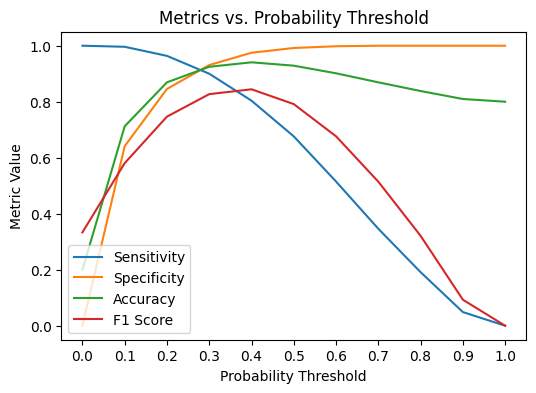

In [113]:
from sklearn.metrics import confusion_matrix
# Convert object columns to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)

# Calculate predicted probabilities for the train data using encoded data
train_probabilities = xgb_classifier.predict_proba(X_train_encoded)[:, 1]

# ... rest of your code ...

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

The chart illustrates how different performance metrics (Sensitivity, Specificity, Accuracy, and F1 Score) change with varying probability thresholds for classification:

Sensitivity (Recall): High at low thresholds but decreases as the threshold increases, meaning more positives are captured initially but fewer as the threshold rises.
Specificity: Starts high and remains stable at higher thresholds, indicating good identification of negatives, but drops at lower thresholds.
Accuracy: Peaks at an intermediate threshold, balancing true positives and true negatives.
F1 Score: Also peaks at a middle threshold, offering the best trade-off between precision and recall.
Key takeaway: There's an optimal threshold where accuracy and F1 score are maximized, balancing the identification of true positives and minimizing false positives. This threshold is ideal if you need a balance between sensitivity and specificity.

**ROC-AUC Curve**

ROC-AUC curve, or Receiver Operating Characteristic-Area Under Curve, is a graph used in machine learning to measure the performance of a binary classifier. It plots the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.

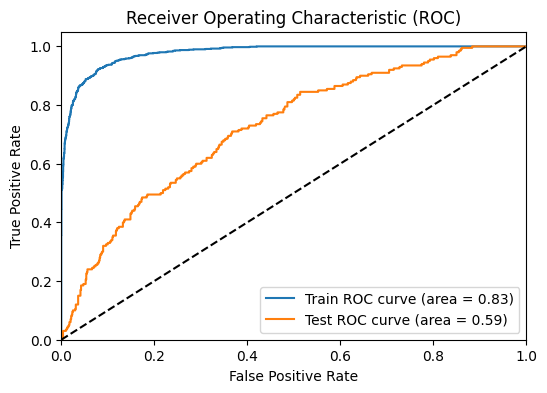

In [114]:
from sklearn.metrics import roc_curve, auc, roc_auc_score



# Convert object columns to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test) # Encode X_test as well

# Calculate predicted probabilities for the train data using encoded data
train_probabilities = xgb_classifier.predict_proba(X_train_encoded)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)
# Get missing columns in test data
missing_cols_test = set(X_train_encoded.columns) - set(X_test_encoded.columns)

# Add missing columns to test data and fill with 0
for c in missing_cols_test:
    X_test_encoded[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Calculate predicted probabilities for the test data using encoded data
test_probabilities = xgb_classifier.predict_proba(X_test_encoded)[:, 1]
# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**Interpretation:**

Train ROC Curve (Blue Line) - AUC = 0.83:

The blue curve represents the model's performance on the training data.
The Area Under the Curve (AUC) is 0.83, indicating strong performance on the training set. A higher AUC suggests that the model is good at distinguishing between positive and negative classes.
The curve is close to the top-left corner, showing high sensitivity (few false negatives) with low false positive rates, indicating a well-performing model on the training set.
Test ROC Curve (Orange Line) - AUC = 0.59:

The orange curve represents the model's performance on the test data.
The AUC is 0.59, which is much lower compared to the training AUC. An AUC of 0.59 is only slightly better than random guessing (AUC of 0.5).
The curve is closer to the diagonal line, suggesting that the model struggles to distinguish between positive and negative classes on the test data.
Key Takeaways:
Overfitting: The significant gap between the training AUC (0.83) and test AUC (0.59) indicates that the model may be overfitting the training data. It performs well on the training set but fails to generalize to unseen data in the test set.

Model Improvement Needed: To improve the model's performance on the test data, you may need to regularize the model, collect more data, or try different algorithms that generalize better.

In summary, while the model performs well on the training set, its poor performance on the test set suggests overfitting and indicates a need for further tuning or adjustments to improve its generalization ability.

**Adding Regularization Parameters to improve Recall score and deal with Overfitting**

Attempt to deal with the overfitting problem using regularization parameters

In [115]:
!pip install xgboost
import xgboost



In [116]:
# Initialize and fit the tuned model
xgb_classifier_tuned = xgboost.XGBClassifier(
    reg_lambda =1,                      # L2 regularization term
    alpha=0.5,                     # L1 regularization term
    max_depth=6,                   # Increase tree depth
    learning_rate=0.05,            # Reduce learning rate
    n_estimators=200,              # Increase number of boosting rounds
    scale_pos_weight=10,           # Increase weight for positive class
    min_child_weight=1,            # Decrease minimum child weight
    subsample=0.8,                 # Subsample ratio of the training instance
    colsample_bytree=0.8           # Subsample ratio of columns when constructing each tree
)



max_depth=4 limits the depth of each tree, reducing the model's capacity to overfit.
learning_rate=0.1 controls how much the model adjusts weights with each boosting round.
n_estimators=100 specifies the number of boosting rounds (trees).

By setting lambda=1 and alpha=0.5, you are instructing the XGBoost model to apply both L2 (ridge) and L1 (lasso) regularization. These regularization techniques are meant to reduce the complexity of the model by penalizing large coefficients, which can help prevent overfitting. Specifically:

L2 Regularization (lambda): Prevents the model from assigning too much importance to any particular feature by penalizing large weights.
L1 Regularization (alpha): Encourages sparsity in the model by driving some feature weights to zero, effectively removing them from the model.

In [117]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [118]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on training data and transform both datasets
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Get feature names from encoder
feature_names = encoder.get_feature_names_out(X_train.columns)

# Convert to DataFrames with correct column names
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)

# Initialize and fit the tuned model
xgb_classifier_tuned = xgboost.XGBClassifier(
    lambda_=1,                    # L2 regularization term
    alpha=0.5,                    # L1 regularization term
    max_depth=6,                  # Increase tree depth
    learning_rate=0.05,           # Reduce learning rate
    n_estimators=200,             # Increase number of boosting rounds
    scale_pos_weight=10,          # Increase weight for positive class
    min_child_weight=1,           # Decrease minimum child weight
    subsample=0.8,                # Subsample ratio of the training instance
    colsample_bytree=0.8          # Subsample ratio of columns when constructing each tree
)

# Convert data to DMatrix format for xgboost.train
dtrain = xgboost.DMatrix(X_train_encoded, label=y_train)
dtest = xgboost.DMatrix(X_test_encoded, label=y_test)

# Set parameters for training
param = xgb_classifier_tuned.get_xgb_params()
param['eval_metric'] = 'logloss'  # Example evaluation metric
num_round = 200  # Number of boosting rounds

# Train the model with early stopping
evallist = [(dtest, 'eval'), (dtrain, 'train')]
bst = xgboost.train(
    param,
    dtrain,
    num_round,
    evallist,
    early_stopping_rounds=10,  # Use early stopping here
    verbose_eval=True
)

[0]	eval-logloss:1.01927	train-logloss:1.01894
[1]	eval-logloss:1.00184	train-logloss:1.00130
[2]	eval-logloss:0.98514	train-logloss:0.98394
[3]	eval-logloss:0.96954	train-logloss:0.96865
[4]	eval-logloss:0.95563	train-logloss:0.95464
[5]	eval-logloss:0.94385	train-logloss:0.94274
[6]	eval-logloss:0.93317	train-logloss:0.93172
[7]	eval-logloss:0.92288	train-logloss:0.91998
[8]	eval-logloss:0.91350	train-logloss:0.91135
[9]	eval-logloss:0.90447	train-logloss:0.90181
[10]	eval-logloss:0.89725	train-logloss:0.89399
[11]	eval-logloss:0.89031	train-logloss:0.88673
[12]	eval-logloss:0.88364	train-logloss:0.87862
[13]	eval-logloss:0.87736	train-logloss:0.87226
[14]	eval-logloss:0.87174	train-logloss:0.86601
[15]	eval-logloss:0.86628	train-logloss:0.85965
[16]	eval-logloss:0.86277	train-logloss:0.85539
[17]	eval-logloss:0.85904	train-logloss:0.85067
[18]	eval-logloss:0.85647	train-logloss:0.84729
[19]	eval-logloss:0.85194	train-logloss:0.84265
[20]	eval-logloss:0.84947	train-logloss:0.83923
[2

Log-Loss: A metric used to evaluate the performance of classification models, particularly in terms of their probabilistic predictions. Lower log-loss values indicate better performance, with less discrepancy between predicted and actual outcomes.

eval-logloss: The log-loss value on the evaluation (validation) dataset.

train-logloss: The log-loss value on the training dataset.

In [119]:
# Predict on the test set
y_pred_proba = bst.predict(dtest)  # Get prediction probabilities
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
recall_XGB_tuned = recall_score(y_test, y_pred)
acc_XGB_tuned = accuracy_score(y_test, y_pred)
precision_XGB_tuned = precision_score(y_test, y_pred)
f1_XGB_tuned = f1_score(y_test, y_pred)

# Print results
print(f"Training Accuracy: {bst.best_score:.4f}")  # Best score from training
print(f"Testing Accuracy: {acc_XGB_tuned:.4f}")
print(f"Recall: {recall_XGB_tuned:.4f}")
print(f"Precision: {precision_XGB_tuned:.4f}")
print(f"F1 Score: {f1_XGB_tuned:.4f}")

Training Accuracy: 0.6221
Testing Accuracy: 0.6140
Recall: 0.7950
Precision: 0.3155
F1 Score: 0.4517


 After some hyperparamer tuning to improve Recall results. A recall of 0.7950 indicates that the model correctly identified 79.50% of the actual positive cases. This is a high recall, suggesting that the model is good at identifying positive cases, though it might be missing some.

**Applying Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, precision_score

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 5, 10],
    'gamma': [0, 1, 5],
    'lambda': [1, 2, 5],
    'alpha': [0, 1, 2]
}

# Initialize XGBoost Classifier
xgb = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(recall_score),  # We can change to precision or F1 if needed
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Recall Score from Cross-Validation:", best_score)

Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


5 folds: This refers to 5-fold cross-validation, which is a technique used to assess the performance of a model. The dataset is divided into 5 equal parts (or folds). The model is trained on 4 folds and tested on the remaining 1 fold. This process is repeated 5 times, with each fold serving as the test set once. Cross-validation helps in getting a more reliable estimate of the model's performance by averaging the results over multiple folds.

19,683 candidates: This indicates that there are 19,683 different combinations of hyperparameters being tested. In hyperparameter tuning, we often specify a range of values for different hyperparameters of your model (e.g., learning rate, max depth). The number of combinations is the product of the number of options for each hyperparameter. For instance, if we are tuning 3 hyperparameters, each with 9 possible values, we would have
9
×
9
×
9
=
729
9×9×9=729 combinations. In this case, the number is larger, so it suggests a more extensive search grid.

98,415 fits: This refers to the total number of model fits or evaluations performed. Each combination of hyperparameters needs to be evaluated across all folds of cross-validation. Therefore, if we have 19,683 combinations and perform 5-fold cross-validation, the total number of fits is
19
,
683
×
5
=
98
,
415
19,683×5=98,415.

This involves evaluating 19,683 different sets of hyperparameters, using 5-fold cross-validation for each set. This results in a total of 98,415 model evaluations to determine the best hyperparameters for the model. This extensive process ensures that the hyperparameters selected are optimal and provide the best performance for the model.

**Exporting the Model**

In [ ]:
import joblib


joblib.dump(xgb_classifier, 'customer_loss_classifier.pkl')